# Pandas 한번에 제대로 배우기
> by 이수안 컴퓨터 연구소 




---



## Pandas 특징
- 부동 소수점이 아닌 데이터 뿐만 아니라 부동 소수점 데이터에서도 결측 데이터(NaN)를 쉽게 처리
- 크기 변이성: 데이터프레임 및 고차원 객체에서 열을 삽입 및 삭제 가능
- 자동 및 명시적 데이터 정렬: 객체를 라벨 집합에 명시적으로 정렬하거나, 사용자가 라벨을 무시하고 Series, Dataframe 등의 계산에서 자동으로 데이터 조정 가능
- 데이터 세트에서 집계 및 변환을 위한 분할(split), 적용(apply), 결합(combine) 작업을 수행할 수 있는 강력하고 유연한 group-by 함수 제공
- 누락된 데이터 또는 다른 Python 및 NumPy 데이터 구조에서 서로 다른 인덱싱 데이터를 DataFrame 개체로 귑게 변환
- 대용량 데이터 세트의 지능형 라벨 기반 슬라이싱, 고급 인덱싱 및 부분 집합 구하기 가능
- 직관적인 데이터 세트 병합 및 결합
- 데이터 세트의 유연한 재구성 및 피벗
- 축의 계층적 라벨링(눈금 당 여러 개의 라벨을 가질 수 있음)
- 플랫 파일(csv 및 구분), Excel 파일, 데이터베이스 로딩 및 초고속 HDF5 형식의 데이터 저장/로드에 사용되는 강력한 IO도구
- 시계열 특정 기능: 날짜 범위 생성 및 주파수 변환, 무빙 윈도우 통계, 날짜 이동 및 지연

In [2]:
import numpy as np
import pandas as pd
pd.__version__

'1.2.4'

## Pandas 객체


### Series 객체

In [6]:
s = pd.Series((0, 0.25, 0.5, 0.75, 1.0))
s

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [7]:
s.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [8]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [9]:
s[1]

0.25

In [10]:
s[1:4]

1    0.25
2    0.50
3    0.75
dtype: float64

In [11]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1], index=['a', 'b', 'c', 'd', 'e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [13]:
s['c']

0.5

In [17]:
'b' in s

True

In [18]:
s.unique()

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [21]:
s.value_counts()

0.00    1
1.00    1
0.50    1
0.75    1
0.25    1
dtype: int64

In [20]:
s.isin([0.25, 0.75])

a    False
b     True
c    False
d     True
e    False
dtype: bool

In [25]:
pop_tuple = {'서울특별시': 9720846, 
            '부산광역시': 3404423, 
            '인천광역시': 2947217,
            '대구광역시': 2427954, 
            '대전광역시': 1471040}
population =pd.Series(pop_tuple)
population

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
dtype: int64

In [26]:
population['서울특별시']

9720846

In [27]:
population['서울특별시':'인천광역시']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
dtype: int64

### DataFrame 객체

In [28]:
pd.DataFrame([{'A': 2, 'B': 4, 'D': 3}, {'A': 4, 'B': 5, 'C': 7}])


,A,B,D,C
0,2,4,3.0,NaN
1,4,5,NaN,7.0


In [30]:
pd.DataFrame(np.random.rand(5, 5), 
            columns = ['A', 'B' ,'C', 'D', 'E'],
            index = [1, 2, 3, 4, 5])

,A,B,C,D,E
1,0.480411,0.390632,0.261853,0.937141,0.064840
2,0.409991,0.945218,0.501853,0.668120,0.957351
3,0.352943,0.501391,0.166705,0.025515,0.957486
4,0.799258,0.720353,0.980737,0.921693,0.463714
5,0.772527,0.956855,0.984953,0.748891,0.380766


In [34]:
male_tuple = {'서울특별시': 4732275, 
            '부산광역시': 1668618, 
            '인천광역시': 1476813,
            '대구광역시': 1198815, 
            '대전광역시': 734441}
male =pd.Series(male_tuple)
print(male)

female_tuple = {'서울특별시': 4988571, 
            '부산광역시': 1735805, 
            '인천광역시': 1470404,
            '대구광역시': 1229139, 
            '대전광역시': 736599}
female =pd.Series(female_tuple)
print(female)

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
dtype: int64
서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
dtype: int64


In [37]:
korea_df = pd.DataFrame({'인구수': population, 
                        '남자인구수': male, 
                        '여자인구수': female})
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,734441,736599


In [38]:
korea_df.index

Index(['서울특별시', '부산광역시', '인천광역시', '대구광역시', '대전광역시'], dtype='object')

In [39]:
korea_df.columns

Index(['인구수', '남자인구수', '여자인구수'], dtype='object')

In [40]:
korea_df['여자인구수']

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
Name: 여자인구수, dtype: int64

In [41]:
korea_df['서울특별시':'인천광역시']

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404


### Index 객체


|클래스|설명|
|--|--|
|Index|일반적인 Index 객체이며, NumPy 배열 형식으로 축의 이름 표현|
|Int64Index|정수 값을 위한 Index|
|MultiIndex|단일 축에 여러 단계 색인을 표현하는 계층적 Index 객체(튜플의 배열과 유사)|
|DatetimeIndex|NumPy의 datetime64 타입으로 타임스탬프 저장|
|PeriodIndex|기간 데이터를 위한 Index|

In [42]:
idx = pd.Index([2, 4, 6, 8, 10])
idx

Int64Index([2, 4, 6, 8, 10], dtype='int64')

In [43]:
idx[1]

4

In [44]:
print(idx)
print(idx.size)
print(idx.shape)
print(idx.ndim)
print(idx.dtype)

Int64Index([2, 4, 6, 8, 10], dtype='int64')
5
(5,)
1
int64


#### Index 연산

|연산자|메소드|설명|
|--|--|--|
|.|`append`|색인 객체를 추가한 새로운 색인 변환|
| `-`|`difference`|색인의 차집합 반환|
| `&`|`intersection`|색인의 교집합 반환|
| `\|`|`union`|색인의 합집합 반환|
|.|`isin`| 색인이 존재하는지 여부를 불리언 배열로 변환|
|.|`delete`|해당 index가 삭제된 새로운 색인 반환|
|.|`drop`|값이 삭제된 새로운 색인 반환|
|.|`insert`|색인이 추가된 새로운 색인 반환|
|.|`is_monotonic`|색인이 단조성을 가지면 True|
|.|`is_unique`|중복되는 색인이 없다면 True|
|.|`unique`|색인에서 중복되는 요소를 제거하고 유일한 값만 반환|
  

In [62]:
idx1 = pd.Index([1, 2, 4, 6, 8])
idx2 = pd.Index([2, 4, 5, 6, 7])

print(idx1.append(idx2))
print(idx1.difference(idx2))
print(idx1.intersection(idx2))
print(idx.union(idx2))
print(idx1.isin([1, 2]))
print(idx1.delete(0))
print(idx1.drop(4))

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 5, 6, 7, 8, 10], dtype='int64')
[ True  True False False False]
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([1, 2, 6, 8], dtype='int64')




---



## 인덱싱(Indexing)

In [63]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
             index = ['a', 'b', 'c', 'd', 'e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [64]:
s['b']

0.25

In [65]:
'b' in s

True

In [74]:
s.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [68]:
list(s.items())

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

In [75]:
s['f'] = 1.25
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [76]:
s['a':'d']

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [77]:
s[0:4]

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [82]:
s[(s > 0.4) & (s < 0.8)]

c    0.50
d    0.75
dtype: float64

In [84]:
s[['a', 'c']]

a    0.0
c    0.5
dtype: float64

### Series 인덱싱

In [85]:
s = pd.Series(['a', 'b', 'c', 'd', 'e'], 
             index = [1, 3, 5, 7, 9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [86]:
s[1]

'a'

In [87]:
s[2:4]

5    c
7    d
dtype: object

In [88]:
s.iloc[1] # 정수값 반환

'b'

In [89]:
s.iloc[2:4]

5    c
7    d
dtype: object

In [91]:
s.reindex(range(10))

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [94]:
s.reindex(range(10), method = 'bfill') # back fill

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

### DataFrame 인덱싱


|사용 방법|설명|
|:--|--|
|`df[val]`|하나의 컬럼 또는 여러 컬럼을 선택|
|`df.loc[val]`|라벨값으로 로우의 부분집합 선택|
|`df.loc[:, val}`|라벨값으로 컬럼의 부분집합 선택|
|`df.loc[val1, val2}`|라벨값으로 로우와 컬럼의 부분집합 선택|
|`df.iloc[where]`|정수 색인으로 로우의 부분집합 선택|
|`df.iloc[:. where]`|정수 색인으로 컬럼의 부분집합 선택|
|`df.iloc[where_i. where_j]`|정수 색인으로 로우와 컬럼의 부분집합 선택|
|`df.at[label_i. label_j]`|로우와 컬럼의 라벨로 단일 값 선택|
|`df.lat[i, j]`|로우와 컬럼의 정수 색인으로 단일 값 선택|
|`reindex`|하나 이상의 축을 새로운 색인으로 재색인|
|`get_value, set_value`|로우와 컬럼의 이름으로 값 선택|

In [95]:
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,734441,736599


In [96]:
korea_df['남자인구수']

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
Name: 남자인구수, dtype: int64

In [97]:
korea_df.남자인구수

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
Name: 남자인구수, dtype: int64

In [98]:
korea_df['남여비율'] = (korea_df['남자인구수'] * 100 / korea_df['여자인구수'])

In [101]:
korea_df

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907
대전광역시,1471040,734441,736599,99.707032


In [102]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.40442300e+06, 1.66861800e+06, 1.73580500e+06, 9.61293463e+01],
       [2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02],
       [2.42795400e+06, 1.19881500e+06, 1.22913900e+06, 9.75329072e+01],
       [1.47104000e+06, 7.34441000e+05, 7.36599000e+05, 9.97070319e+01]])

In [103]:
korea_df.T

,서울특별시,부산광역시,인천광역시,대구광역시,대전광역시
인구수,9.720846e+06,3.404423e+06,2.947217e+06,2.427954e+06,1.471040e+06
남자인구수,4.732275e+06,1.668618e+06,1.476813e+06,1.198815e+06,7.344410e+05
여자인구수,4.988571e+06,1.735805e+06,1.470404e+06,1.229139e+06,7.365990e+05
남여비율,9.486234e+01,9.612935e+01,1.004359e+02,9.753291e+01,9.970703e+01


In [104]:
korea_df.values[0]

array([9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01])

In [106]:
korea_df['인구수']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
Name: 인구수, dtype: int64

In [107]:
korea_df.loc[:'인천광역시', :'남자인구수']

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


In [108]:
korea_df.loc[(korea_df.여자인구수 > 1000000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907


In [109]:
korea_df.loc[(korea_df.인구수 < 2000000)]

,인구수,남자인구수,여자인구수,남여비율
대전광역시,1471040,734441,736599,99.707032


In [110]:
korea_df.loc[(korea_df.인구수 > 2500000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867


In [111]:
korea_df.loc[korea_df.남여비율 > 100]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947217,1476813,1470404,100.435867


In [116]:
korea_df

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907
대전광역시,1471040,734441,736599,99.707032


In [118]:
korea_df.iloc[:3, :2]

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


### 다중 인덱싱(Multi Indexing)

* 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리
* 단일 인덱스 내에 여러 인덱스를 포함하는 다중 인덱싱

#### 다중 인덱스 Series

In [120]:
korea_df

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907
대전광역시,1471040,734441,736599,99.707032


In [124]:
idx_tuples = [('서울특별시', 2010), ('서울특별시', 2020),
              ('부산광역시', 2010), ('부산광역시', 2020), 
              ('인천광역시', 2010), ('인천광역시', 2020), 
              ('대구광역시', 2010), ('대구광역시', 2020), 
              ('대전광역시', 2010), ('대전광역시', 2020)] 
idx_tuples

[('서울특별시', 2010),
 ('서울특별시', 2020),
 ('부산광역시', 2010),
 ('부산광역시', 2020),
 ('인천광역시', 2010),
 ('인천광역시', 2020),
 ('대구광역시', 2010),
 ('대구광역시', 2020),
 ('대전광역시', 2010),
 ('대전광역시', 2020)]

In [137]:
pop_tuples = [10312545, 9720846, 3567910, 3404423, 2758297, 2947217, 
             2511676, 2427954, 1503664, 1471040]
population = pd.Series(pop_tuples, index = idx_tuples)
population

(서울특별시, 2010)    10312545
(서울특별시, 2020)     9720846
(부산광역시, 2010)     3567910
(부산광역시, 2020)     3404423
(인천광역시, 2010)     2758297
(인천광역시, 2020)     2947217
(대구광역시, 2010)     2511676
(대구광역시, 2020)     2427954
(대전광역시, 2010)     1503664
(대전광역시, 2020)     1471040
dtype: int64

In [138]:
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('서울특별시', 2010),
            ('서울특별시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020),
            ('대구광역시', 2010),
            ('대구광역시', 2020),
            ('대전광역시', 2010),
            ('대전광역시', 2020)],
           )

In [139]:
population = population.reindex(midx)
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     3567910
       2020     3404423
인천광역시  2010     2758297
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
dtype: int64

In [141]:
population[:, 2010]

서울특별시    10312545
부산광역시     3567910
인천광역시     2758297
대구광역시     2511676
대전광역시     1503664
dtype: int64

In [146]:
population['대전광역시',:]

2010    1503664
2020    1471040
dtype: int64

In [147]:
korea_mdf = population.unstack()
korea_mdf

,2010,2020
대구광역시,2511676,2427954
대전광역시,1503664,1471040
부산광역시,3567910,3404423
서울특별시,10312545,9720846
인천광역시,2758297,2947217


In [150]:
korea_mdf.stack()

대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
부산광역시  2010     3567910
       2020     3404423
서울특별시  2010    10312545
       2020     9720846
인천광역시  2010     2758297
       2020     2947217
dtype: int64

In [155]:
male_tuples = [5111259, 4732275, 1773170, 1668618, 1390356, 1476813, 
             1255245, 1198815, 753648, 734441]
male_tuples

[5111259,
 4732275,
 1773170,
 1668618,
 1390356,
 1476813,
 1255245,
 1198815,
 753648,
 734441]

In [158]:
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     3567910
       2020     3404423
인천광역시  2010     2758297
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
dtype: int64

In [223]:
korea_mdf = pd.DataFrame({'총인구수':population, 
                         '남자인구수': male_tuples})
korea_mdf

총인구수    남자인구수
행정구역  년도                     
서울특별시 2010  10312545  5111259
      2020   9720846  4732275
부산광역시 2010   3567910  1773170
      2020   3404423  1668618
인천광역시 2010   2758297  1390356
      2020   2947217  1476813
대구광역시 2010   2511676  1255245
      2020   2427954  1198815
대전광역시 2010   1503664   753648
      2020   1471040   734441

In [224]:
female_tuples = [5201286, 4988571, 1794740, 1735805, 1367940, 1470404,
                1256431, 1229139, 750016, 736599]
female_tuples

[5201286,
 4988571,
 1794740,
 1735805,
 1367940,
 1470404,
 1256431,
 1229139,
 750016,
 736599]

In [225]:
korea_mdf = pd.DataFrame({'총인구수':population, 
                         '남자인구수': male_tuples, 
                         '여자인구수': female_tuples})
korea_mdf

총인구수    남자인구수    여자인구수
행정구역  년도                              
서울특별시 2010  10312545  5111259  5201286
      2020   9720846  4732275  4988571
부산광역시 2010   3567910  1773170  1794740
      2020   3404423  1668618  1735805
인천광역시 2010   2758297  1390356  1367940
      2020   2947217  1476813  1470404
대구광역시 2010   2511676  1255245  1256431
      2020   2427954  1198815  1229139
대전광역시 2010   1503664   753648   750016
      2020   1471040   734441   736599

In [226]:
ratio = korea_mdf['남자인구수'] * 100 / korea_mdf['여자인구수']
ratio

행정구역   년도  
서울특별시  2010     98.269140
       2020     94.862336
부산광역시  2010     98.798155
       2020     96.129346
인천광역시  2010    101.638668
       2020    100.435867
대구광역시  2010     99.905606
       2020     97.532907
대전광역시  2010    100.484256
       2020     99.707032
dtype: float64

In [227]:
ratio.unstack()

년도,2010,2020
행정구역,,
대구광역시,99.905606,97.532907
대전광역시,100.484256,99.707032
부산광역시,98.798155,96.129346
서울특별시,98.269140,94.862336
인천광역시,101.638668,100.435867


In [228]:
korea_mdf = pd.DataFrame({'총인구수':population, 
                         '남자인구수': male_tuples, 
                         '여자인구수': female_tuples, 
                         '남여비율': ratio})
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
부산광역시 2010   3567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758297  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032

#### 다중 인덱스 생성

In [165]:
df = pd.DataFrame(np.random.rand(6, 3), 
                 index = [['a', 'a', 'b', 'b', 'c', 'c'], [1, 2, 1, 2, 1, 2]], 
                 columns = ['c1', 'c2', 'c3'])
df

c1        c2        c3
a 1  0.472749  0.968537  0.418600
  2  0.203213  0.001083  0.828604
b 1  0.066785  0.456441  0.349855
  2  0.029368  0.869410  0.757202
c 1  0.595198  0.629096  0.028985
  2  0.412820  0.335710  0.547151

In [166]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b', 'c', 'c'], [1, 2, 1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [169]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2), ('c', 1), ('c', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [170]:
pd.MultiIndex.from_product([['a', 'b', 'c'], [1, 2]]) # 곱 형태

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [171]:
pd.MultiIndex(levels = [['a', 'b', 'c'], [1, 2]],
             codes = [[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [172]:
#########
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     3567910
       2020     3404423
인천광역시  2010     2758297
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
dtype: int64

In [222]:
population.index.names = ['행정구역', '년도']
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     3567910
       2020     3404423
인천광역시  2010     2758297
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
dtype: int64

In [177]:
idx = pd.MultiIndex.from_product([['a', 'b', 'c'], [1, 2]], 
                                names = ['name1', 'name2'])
cols = pd.MultiIndex.from_product([['c1', 'c2', 'c3'], [1, 2]], 
                                 names = ['col_name1', 'col_name2'])

data = np.round(np.random.randn(6, 6), 2)
mdf = pd.DataFrame(data, index = idx, columns = cols)
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1     -0.25 -0.88 -0.16  0.07 -0.11 -0.88
      2      0.35  3.33  0.19 -0.32  1.48  0.38
b     1     -0.32 -1.52  0.35  0.37 -1.22  0.03
      2     -0.06  0.33 -0.51 -0.11 -1.25  0.70
c     1      0.30 -0.55  1.04  0.84  1.48  0.79
      2     -0.36 -0.42  2.63  0.86  0.45 -1.31

In [179]:
mdf['c2']

col_name2       1     2
name1 name2            
a     1     -0.16  0.07
      2      0.19 -0.32
b     1      0.35  0.37
      2     -0.51 -0.11
c     1      1.04  0.84
      2      2.63  0.86

#### 인덱싱 및 슬라이싱

In [180]:
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     3567910
       2020     3404423
인천광역시  2010     2758297
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
dtype: int64

In [181]:
population['인천광역시', 2010]

2758297

In [183]:
population[:, 2010]

행정구역
서울특별시    10312545
부산광역시     3567910
인천광역시     2758297
대구광역시     2511676
대전광역시     1503664
dtype: int64

In [185]:
population[population > 3000000]

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     3567910
       2020     3404423
dtype: int64

In [186]:
population[['대구광역시', '대전광역시']]

행정구역   년도  
대구광역시  2010    2511676
       2020    2427954
대전광역시  2010    1503664
       2020    1471040
dtype: int64

In [187]:
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1     -0.25 -0.88 -0.16  0.07 -0.11 -0.88
      2      0.35  3.33  0.19 -0.32  1.48  0.38
b     1     -0.32 -1.52  0.35  0.37 -1.22  0.03
      2     -0.06  0.33 -0.51 -0.11 -1.25  0.70
c     1      0.30 -0.55  1.04  0.84  1.48  0.79
      2     -0.36 -0.42  2.63  0.86  0.45 -1.31

In [195]:
mdf['c2', 1]

name1  name2
a      1       -0.16
       2        0.19
b      1        0.35
       2       -0.51
c      1        1.04
       2        2.63
Name: (c2, 1), dtype: float64

In [189]:
mdf.iloc[:3, :4]

col_name1      c1          c2      
col_name2       1     2     1     2
name1 name2                        
a     1     -0.25 -0.88 -0.16  0.07
      2      0.35  3.33  0.19 -0.32
b     1     -0.32 -1.52  0.35  0.37

In [204]:
mdf.loc['a', ('c2', 1)]

name2
1   -0.16
2    0.19
Name: (c2, 1), dtype: float64

In [205]:
idx_slice = pd.IndexSlice # IndexSlice                                                                                                                                             
mdf.loc[idx_slice[:, 2], idx_slice[:, 2]]

,col_name1,c1,c2,c3
,col_name2,2,2,2
name1,name2,,,
a,2,3.33,-0.32,0.38
b,2,0.33,-0.11,0.70
c,2,-0.42,0.86,-1.31


#### 다중 인덱스 재정렬

In [206]:
idx

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           names=['name1', 'name2'])

In [229]:
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
부산광역시 2010   3567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758297  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032

In [230]:
korea_mdf['서울특별시':'인천광역시'] # --> raise UnsortedIndexError

UnsortedIndexError: 'Key length (1) was greater than MultiIndex lexsort depth (0)'

In [232]:
korea_mdf = korea_mdf.sort_index()
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   3567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758297  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [233]:
korea_mdf['서울특별시':'인천광역시']

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758297  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [234]:
korea_mdf.unstack(level = 0)

총인구수                                         남자인구수                   \
행정구역    대구광역시    대전광역시    부산광역시     서울특별시    인천광역시    대구광역시   대전광역시    부산광역시   
년도                                                                             
2010  2511676  1503664  3567910  10312545  2758297  1255245  753648  1773170   
2020  2427954  1471040  3404423   9720846  2947217  1198815  734441  1668618   

                          여자인구수                                          남여비율  \
행정구역    서울특별시    인천광역시    대구광역시   대전광역시    부산광역시    서울특별시    인천광역시      대구광역시   
년도                                                                              
2010  5111259  1390356  1256431  750016  1794740  5201286  1367940  99.905606   
2020  4732275  1476813  1229139  736599  1735805  4988571  1470404  97.532907   

                                                    
행정구역       대전광역시      부산광역시      서울특별시       인천광역시  
년도                                                  
2010  100.484256  98.798155  98.269140  101.638668  
2020   99.707032  96.129346  94.862336  100.435867

In [235]:
korea_mdf.unstack(level = 1)

총인구수             남자인구수             여자인구수                 남여비율  \
년도         2010     2020     2010     2020     2010     2020        2010   
행정구역                                                                       
대구광역시   2511676  2427954  1255245  1198815  1256431  1229139   99.905606   
대전광역시   1503664  1471040   753648   734441   750016   736599  100.484256   
부산광역시   3567910  3404423  1773170  1668618  1794740  1735805   98.798155   
서울특별시  10312545  9720846  5111259  4732275  5201286  4988571   98.269140   
인천광역시   2758297  2947217  1390356  1476813  1367940  1470404  101.638668   

                   
년도           2020  
행정구역               
대구광역시   97.532907  
대전광역시   99.707032  
부산광역시   96.129346  
서울특별시   94.862336  
인천광역시  100.435867

In [236]:
korea_mdf.stack()

행정구역   년도         
대구광역시  2010  총인구수     2.511676e+06
             남자인구수    1.255245e+06
             여자인구수    1.256431e+06
             남여비율     9.990561e+01
       2020  총인구수     2.427954e+06
             남자인구수    1.198815e+06
             여자인구수    1.229139e+06
             남여비율     9.753291e+01
대전광역시  2010  총인구수     1.503664e+06
             남자인구수    7.536480e+05
             여자인구수    7.500160e+05
             남여비율     1.004843e+02
       2020  총인구수     1.471040e+06
             남자인구수    7.344410e+05
             여자인구수    7.365990e+05
             남여비율     9.970703e+01
부산광역시  2010  총인구수     3.567910e+06
             남자인구수    1.773170e+06
             여자인구수    1.794740e+06
             남여비율     9.879815e+01
       2020  총인구수     3.404423e+06
             남자인구수    1.668618e+06
             여자인구수    1.735805e+06
             남여비율     9.612935e+01
서울특별시  2010  총인구수     1.031254e+07
             남자인구수    5.111259e+06
             여자인구수    5.201286e+06
             남여비율     9.826914e+01
 

In [237]:
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   3567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758297  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [238]:
idx_flat = korea_mdf.reset_index(level = 0)
idx_flat

,행정구역,총인구수,남자인구수,여자인구수,남여비율
년도,,,,,
2010,대구광역시,2511676,1255245,1256431,99.905606
2020,대구광역시,2427954,1198815,1229139,97.532907
2010,대전광역시,1503664,753648,750016,100.484256
2020,대전광역시,1471040,734441,736599,99.707032
2010,부산광역시,3567910,1773170,1794740,98.798155
2020,부산광역시,3404423,1668618,1735805,96.129346
2010,서울특별시,10312545,5111259,5201286,98.269140
2020,서울특별시,9720846,4732275,4988571,94.862336
2010,인천광역시,2758297,1390356,1367940,101.638668


In [239]:
idx_flat = korea_mdf.reset_index(level = (0, 1))
idx_flat

,행정구역,년도,총인구수,남자인구수,여자인구수,남여비율
0,대구광역시,2010,2511676,1255245,1256431,99.905606
1,대구광역시,2020,2427954,1198815,1229139,97.532907
2,대전광역시,2010,1503664,753648,750016,100.484256
3,대전광역시,2020,1471040,734441,736599,99.707032
4,부산광역시,2010,3567910,1773170,1794740,98.798155
5,부산광역시,2020,3404423,1668618,1735805,96.129346
6,서울특별시,2010,10312545,5111259,5201286,98.269140
7,서울특별시,2020,9720846,4732275,4988571,94.862336
8,인천광역시,2010,2758297,1390356,1367940,101.638668
9,인천광역시,2020,2947217,1476813,1470404,100.435867


In [240]:
idx_flat.set_index(['행정구역', '년도'])

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   3567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758297  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

## 데이터 연산

In [2]:
s = pd.Series(np.random.randint(0, 10, 5))
s

0    8
1    6
2    0
3    6
4    7
dtype: int32

In [3]:
df = pd.DataFrame(np.random.randint(0, 10, (3, 3)),
                 columns = ['A', 'B', 'C'])
df

,A,B,C
0,4,6,1
1,1,6,5
2,0,2,4


In [4]:
np.exp(s)

0    2980.957987
1     403.428793
2       1.000000
3     403.428793
4    1096.633158
dtype: float64

In [5]:
np.cos(df * np.pi / 4)

,A,B,C
0,-1.000000,-1.836970e-16,0.707107
1,0.707107,-1.836970e-16,-0.707107
2,1.000000,6.123234e-17,-1.000000


In [6]:
s1 = pd.Series([1, 3, 5, 7, 9], index = [0, 1, 2, 3, 4])
s2 = pd.Series([2, 4, 6, 8, 10], index = [1, 2, 3, 4, 5])
s1 + s2 # 같은 index 기준

0     NaN
1     5.0
2     9.0
3    13.0
4    17.0
5     NaN
dtype: float64

In [8]:
s1.add(s2, fill_value = 0)

0     1.0
1     5.0
2     9.0
3    13.0
4    17.0
5    10.0
dtype: float64

In [18]:
df1 = pd.DataFrame(np.random.randint(0, 10, (3, 3)), 
                  columns = list('ACD'))
df1

,A,C,D
0,9,1,5
1,8,8,3
2,6,2,4


In [14]:
df2 = pd.DataFrame(np.random.randint(0, 10, (5, 5)), 
                  columns = list('BAECD'))
df2

,B,A,E,C,D
0,1,0,1,9,2
1,9,9,3,8,1
2,1,5,0,1,8
3,9,0,5,5,0
4,3,5,4,6,4


In [15]:
df1 + df2 # 인덱스에 따라 연산

,A,B,C,D,E,F
0,8,NaN,14,5,3,NaN
1,12,NaN,12,10,7,NaN
2,5,NaN,5,14,3,NaN
3,5,NaN,9,5,13,NaN
4,12,NaN,9,13,8,NaN


In [22]:
fvalue = df1.stack().mean()
df1.add(df2, fill_value = fvalue)

,A,B,C,D,E
0,9.000000,6.111111,10.000000,7.000000,6.111111
1,17.000000,14.111111,16.000000,4.000000,8.111111
2,11.000000,6.111111,3.000000,12.000000,5.111111
3,5.111111,14.111111,10.111111,5.111111,10.111111
4,10.111111,8.111111,11.111111,9.111111,9.111111


### 연산자 범용 함수


|Python 연산자|Pandas 메소드|
|:--|:--|
|`+`|`add`, `radd`|
|`-`|`sub`, `rsub`, `subtract`|
|`*`|`mul`, `rmul`, `multiply`|
|`/`|`truediv`, `div`, `rdiv`, `divide`|
|`//`|`floordiv`, `rfloordiv`|
|`%`|`mod`|
|`**`|`pow`, `rpow`|

#### add()

In [23]:
a = np.random.randint(1, 10, size = (3, 3))
a

array([[4, 9, 6],
       [6, 7, 5],
       [7, 7, 4]])

In [24]:
a + a[0]

array([[ 8, 18, 12],
       [10, 16, 11],
       [11, 16, 10]])

In [26]:
df = pd.DataFrame(a, columns = list('ABC'))
df

,A,B,C
0,4,9,6
1,6,7,5
2,7,7,4


In [27]:
df + df.iloc[0] # NumPy와 같이 브로드캐스팅 됨

,A,B,C
0,8,18,12
1,10,16,11
2,11,16,10


In [28]:
df.add(df.iloc[0])

,A,B,C
0,8,18,12
1,10,16,11
2,11,16,10


#### sub() / subtract()

In [29]:
a

array([[4, 9, 6],
       [6, 7, 5],
       [7, 7, 4]])

In [30]:
a - a[0]

array([[ 0,  0,  0],
       [ 2, -2, -1],
       [ 3, -2, -2]])

In [31]:
df

,A,B,C
0,4,9,6
1,6,7,5
2,7,7,4


In [32]:
df - df.iloc[0]


,A,B,C
0,0,0,0
1,2,-2,-1
2,3,-2,-2


In [33]:
df.sub(df.iloc[0])

,A,B,C
0,0,0,0
1,2,-2,-1
2,3,-2,-2


In [35]:
df.subtract(df['B'], axis = 0)

,A,B,C
0,-5,0,-3
1,-1,0,-2
2,0,0,-3


#### mul() / multply()




In [36]:
a

array([[4, 9, 6],
       [6, 7, 5],
       [7, 7, 4]])

In [38]:
a*a[0]

array([[16, 81, 36],
       [24, 63, 30],
       [28, 63, 24]])

In [39]:
df

,A,B,C
0,4,9,6
1,6,7,5
2,7,7,4


In [40]:
df * df.iloc[1]

,A,B,C
0,24,63,30
1,36,49,25
2,42,49,20


In [41]:
df.mul(df.iloc[1])

,A,B,C
0,24,63,30
1,36,49,25
2,42,49,20


In [42]:
df.multiply(df.iloc[2])

,A,B,C
0,28,63,24
1,42,49,20
2,49,49,16


#### truediv() /  div() / divide() / floordiv()

In [43]:
a

array([[4, 9, 6],
       [6, 7, 5],
       [7, 7, 4]])

In [44]:
a/a[0]

array([[1.        , 1.        , 1.        ],
       [1.5       , 0.77777778, 0.83333333],
       [1.75      , 0.77777778, 0.66666667]])

In [45]:
df / df.iloc[0]

,A,B,C
0,1.00,1.000000,1.000000
1,1.50,0.777778,0.833333
2,1.75,0.777778,0.666667


In [46]:
df.truediv(df.iloc[0])

,A,B,C
0,1.00,1.000000,1.000000
1,1.50,0.777778,0.833333
2,1.75,0.777778,0.666667


In [47]:
a // a[0]

array([[1, 1, 1],
       [1, 0, 0],
       [1, 0, 0]], dtype=int32)

In [49]:
df.floordiv(df.iloc[0])

,A,B,C
0,1,1,1
1,1,0,0
2,1,0,0


#### mod()

In [50]:
a

array([[4, 9, 6],
       [6, 7, 5],
       [7, 7, 4]])

In [51]:
a % a[0]

array([[0, 0, 0],
       [2, 7, 5],
       [3, 7, 4]], dtype=int32)

In [52]:
df

,A,B,C
0,4,9,6
1,6,7,5
2,7,7,4


In [53]:
df.mod(df.iloc[0])

,A,B,C
0,0,0,0
1,2,7,5
2,3,7,4


#### pow()

In [54]:
a ** a[0]

array([[      256, 387420489,     46656],
       [     1296,  40353607,     15625],
       [     2401,  40353607,      4096]], dtype=int32)

In [55]:
df

,A,B,C
0,4,9,6
1,6,7,5
2,7,7,4


In [56]:
df.pow(df.iloc[0])

,A,B,C
0,256,387420489,46656
1,1296,40353607,15625
2,2401,40353607,4096


In [57]:
row = df.iloc[0, ::2]
row

A    4
C    6
Name: 0, dtype: int32

In [58]:
df - row

,A,B,C
0,0.0,NaN,0.0
1,2.0,NaN,-1.0
2,3.0,NaN,-2.0


### 정렬(Sort)

In [60]:
s = pd.Series(range(5), index = ['A', 'D', 'B', 'C', 'E'])
s

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [61]:
s.sort_index()

A    0
B    2
C    3
D    1
E    4
dtype: int64

In [62]:
s.sort_values()

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [63]:
df = pd.DataFrame(np.random.randint(0, 10, (4, 4)), 
                 index = [2, 4, 1, 3], 
                 columns = list('BDAC'))
df

,B,D,A,C
2,0,6,7,4
4,8,9,1,0
1,4,7,8,3
3,1,2,1,4


In [65]:
df.sort_index()

,B,D,A,C
1,4,7,8,3
2,0,6,7,4
3,1,2,1,4
4,8,9,1,0


In [68]:
df.sort_index(axis = 1)

,A,B,C,D
2,7,0,4,6
4,1,8,0,9
1,8,4,3,7
3,1,1,4,2


In [66]:
df.sort_values(by = 'A') # 기준 열

,B,D,A,C
4,8,9,1,0
3,1,2,1,4
2,0,6,7,4
1,4,7,8,3


In [67]:
df.sort_values(by = ['A', 'C']) # A 이후 C 순으로 정렬

,B,D,A,C
4,8,9,1,0
3,1,2,1,4
2,0,6,7,4
1,4,7,8,3


### 순위(Ranking)


|메소드|설명|
|:--|:--|
|`average`|기본값. 순위에 같은 값을 가지는 항목들의 평균 값을 사용|
|`min`|같은 값을 가지는 그룹을 낮은 순위로 지정|
|`max`|같은 값을 가지는 그룹을 높은 순위로 지정|
|`first`|데이터 내의 위치에 따라 순위 지정|
|`dense`|같은 그룹 내에서 모두 같은 순위를 적용하지 않고 1씩 증가|

In [69]:
s = pd.Series([-2, 4, 7, -4, 1, 5, 2, 5])
s

0   -2
1    4
2    7
3   -4
4    1
5    5
6    2
7    5
dtype: int64

In [70]:
s.rank() # 각 index별 랭크 (동일값은 .5)

0    2.0
1    5.0
2    8.0
3    1.0
4    3.0
5    6.5
6    4.0
7    6.5
dtype: float64

In [71]:
s.rank(method = 'first') # 동일 값이라도 먼저 온 값에 순위를 더 높여줌

0    2.0
1    5.0
2    8.0
3    1.0
4    3.0
5    6.0
6    4.0
7    7.0
dtype: float64

In [73]:
s.rank(method = 'max') # 동일 값 순위 올림(6.5 -> 7)

0    2.0
1    5.0
2    8.0
3    1.0
4    3.0
5    7.0
6    4.0
7    7.0
dtype: float64

### 고성능 연산 pd.eval, pd.query

In [76]:
nrows, ncols = 10000, 100
df1, df2, df3, df4 = (pd.DataFrame(np.random.rand(nrows, ncols)) for i in range(4))

In [78]:
%timeit df1 + df2 + df3 + df4

8.64 ms ± 215 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [79]:
%timeit pd.eval('df1 + df2 + df3 + df4')

6.36 ms ± 73.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [80]:
%timeit df1 * -df2 / (-df3 * df4)

15.6 ms ± 436 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [83]:
%timeit pd.eval('df1 * -df2 / (-df3 * df4)')

6.63 ms ± 99.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [85]:
df = pd.DataFrame(np.random.rand(1000000, 5), columns = list('ABCDE'))
df.head()

,A,B,C,D,E
0,0.641301,0.310120,0.101351,0.748783,0.039265
1,0.424981,0.038268,0.549519,0.726498,0.728869
2,0.003499,0.424629,0.107606,0.429814,0.295551
3,0.415023,0.790073,0.214719,0.960948,0.467010
4,0.004172,0.485605,0.020616,0.021970,0.024636


In [86]:
%timeit df['A'] + df['B'] / df['C'] - df['D'] * df['E']

16.3 ms ± 926 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [88]:
%timeit pd.eval('df.A + df.B / df.C - df.D * df.E')

5.57 ms ± 192 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [89]:
%timeit df.eval('A + B / C - D * E')

11.5 ms ± 26.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [92]:
df.eval('R = A + B / C - D * E', inplace = True) # 열에 값 추가
df.head()

,A,B,C,D,E,R
0,0.641301,0.310120,0.101351,0.748783,0.039265,3.671774
1,0.424981,0.038268,0.549519,0.726498,0.728869,-0.034902
2,0.003499,0.424629,0.107606,0.429814,0.295551,3.822611
3,0.415023,0.790073,0.214719,0.960948,0.467010,3.645822
4,0.004172,0.485605,0.020616,0.021970,0.024636,23.558891


In [96]:
col_mean = df.mean(1)
df['A'] + col_mean

0         1.560066
1         0.830519
2         0.850785
3         1.497289
4         4.023487
            ...   
999995    1.514057
999996    1.843659
999997    0.628248
999998    0.922213
999999    1.105709
Length: 1000000, dtype: float64

In [97]:
df.eval('A + @col_mean')

0         1.560066
1         0.830519
2         0.850785
3         1.497289
4         4.023487
            ...   
999995    1.514057
999996    1.843659
999997    0.628248
999998    0.922213
999999    1.105709
Length: 1000000, dtype: float64

In [98]:
df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]

,A,B,C,D,E,R
1,0.424981,0.038268,0.549519,0.726498,0.728869,-0.034902
15,0.345195,0.071002,0.845290,0.053175,0.572531,0.398748
36,0.122183,0.174952,0.787148,0.653953,0.054990,0.308483
45,0.329193,0.069272,0.568244,0.017256,0.947376,0.434751
47,0.136199,0.057219,0.504028,0.969802,0.588140,-0.320657
...,...,...,...,...,...,...
999973,0.227572,0.421288,0.955111,0.228909,0.233336,0.615247
999976,0.042678,0.125053,0.777993,0.189511,0.301331,0.146309
999978,0.424474,0.080124,0.624827,0.084814,0.274380,0.529437
999990,0.421117,0.123769,0.759835,0.184489,0.838719,0.429272


In [99]:
pd.eval('df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]')

,A,B,C,D,E,R
1,0.424981,0.038268,0.549519,0.726498,0.728869,-0.034902
15,0.345195,0.071002,0.845290,0.053175,0.572531,0.398748
36,0.122183,0.174952,0.787148,0.653953,0.054990,0.308483
45,0.329193,0.069272,0.568244,0.017256,0.947376,0.434751
47,0.136199,0.057219,0.504028,0.969802,0.588140,-0.320657
...,...,...,...,...,...,...
999973,0.227572,0.421288,0.955111,0.228909,0.233336,0.615247
999976,0.042678,0.125053,0.777993,0.189511,0.301331,0.146309
999978,0.424474,0.080124,0.624827,0.084814,0.274380,0.529437
999990,0.421117,0.123769,0.759835,0.184489,0.838719,0.429272


In [100]:
df.query('(A < 0.5) and (B < 0.5) and (C > 0.5)')

,A,B,C,D,E,R
1,0.424981,0.038268,0.549519,0.726498,0.728869,-0.034902
15,0.345195,0.071002,0.845290,0.053175,0.572531,0.398748
36,0.122183,0.174952,0.787148,0.653953,0.054990,0.308483
45,0.329193,0.069272,0.568244,0.017256,0.947376,0.434751
47,0.136199,0.057219,0.504028,0.969802,0.588140,-0.320657
...,...,...,...,...,...,...
999973,0.227572,0.421288,0.955111,0.228909,0.233336,0.615247
999976,0.042678,0.125053,0.777993,0.189511,0.301331,0.146309
999978,0.424474,0.080124,0.624827,0.084814,0.274380,0.529437
999990,0.421117,0.123769,0.759835,0.184489,0.838719,0.429272


## 데이터 결합

### Concat() / Append()

In [101]:
s1 = pd.Series(['a', 'b'], index = [1, 2])
s2 = pd.Series(['c', 'd'], index = [3, 4])
pd.concat([s1, s2])

1    a
2    b
3    c
4    d
dtype: object

In [102]:
def create_df(cols, idx):
    data = {c: [str(c.lower()) + str(i) for i in idx] for c in cols} 
    return pd.DataFrame(data, idx)

In [103]:
df1 = create_df('AB', [1, 2])
df1

,A,B
1,a1,b1
2,a2,b2


In [105]:
df2 = create_df('AB', [3, 4])
df2

,A,B
3,a3,b3
4,a4,b4


In [106]:
pd.concat([df1, df2])

,A,B
1,a1,b1
2,a2,b2
3,a3,b3
4,a4,b4


In [117]:
df3 = create_df('AB', [0, 1])
df3

,A,B
0,a0,b0
1,a1,b1


In [108]:
df4 = create_df('CD', [0, 1])
df4

,C,D
0,c0,d0
1,c1,d1


In [110]:
pd.concat([df3, df4])

,A,B,C,D
0,a0,b0,NaN,NaN
1,a1,b1,NaN,NaN
0,NaN,NaN,c0,d0
1,NaN,NaN,c1,d1


In [125]:
pd.concat([df3, df4], axis = 1)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1


In [126]:
pd.concat([df1, df3])

,A,B
1,a1,b1
2,a2,b2
0,a0,b0
1,a1,b1


In [118]:
pd.concat([df1, df3], verify_integrity = True) # 겹치는 행이 있어서 충돌 오류 발생

ValueError: Indexes have overlapping values: Int64Index([1], dtype='int64')

In [119]:
pd.concat([df1, df3], ignore_index = True) # 무시하고 강제 결합

,A,B
0,a1,b1
1,a2,b2
2,a0,b0
3,a1,b1


In [120]:
pd.concat([df1, df3], keys = ['X', 'Y']) 

A   B
X 1  a1  b1
  2  a2  b2
Y 0  a0  b0
  1  a1  b1

In [122]:
df5 = create_df('ABC', [1, 2])
df6 = create_df('BCD', [3, 4])
pd.concat([df5, df6])

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [123]:
pd.concat([df5, df6], join = 'inner') # inner조인: 둘 다 존재하는 부분만 조인

,B,C
1,b1,c1
2,b2,c2
3,b3,c3
4,b4,c4


In [124]:
df5.append(df6)

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


### 병합과 조인

In [127]:
df1 = pd.DataFrame({'학생': ['홍길동', '이순신', '임꺽정', '김유신'],
                   '학과': ['경영학과', '교육학과', '컴퓨터학과', '통계학과']})
df1

,학생,학과
0,홍길동,경영학과
1,이순신,교육학과
2,임꺽정,컴퓨터학과
3,김유신,통계학과


In [128]:
df2 = pd.DataFrame({'학생': ['홍길동', '이순신', '임꺽정', '김유신'],
                   '입학년도': [2012, 2016, 2019, 2020]})
df2

,학생,입학년도
0,홍길동,2012
1,이순신,2016
2,임꺽정,2019
3,김유신,2020


In [129]:
df3 = pd.merge(df1, df2)
df3

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [130]:
df4 = pd.DataFrame({'학과': ['경영학과', '교육학과', '컴퓨터학과', '통계학과'],
                   '학과장': ['황희', '장영실', '안창호', '정약용']})
df4

,학과,학과장
0,경영학과,황희
1,교육학과,장영실
2,컴퓨터학과,안창호
3,통계학과,정약용


In [131]:
pd.merge(df3, df4)

,학생,학과,입학년도,학과장
0,홍길동,경영학과,2012,황희
1,이순신,교육학과,2016,장영실
2,임꺽정,컴퓨터학과,2019,안창호
3,김유신,통계학과,2020,정약용


In [132]:
df5 = pd.DataFrame({'학과': ['경영학과', '교육학과', '교육학과', '컴퓨터학과', '컴퓨터학과', '통계학과']
                   , '과목': ['경영개론', '기초수학', '물리학', '프로그래밍', '운영체제', '확률론']})
df5


,학과,과목
0,경영학과,경영개론
1,교육학과,기초수학
2,교육학과,물리학
3,컴퓨터학과,프로그래밍
4,컴퓨터학과,운영체제
5,통계학과,확률론


In [134]:
pd.merge(df1, df5)

,학생,학과,과목
0,홍길동,경영학과,경영개론
1,이순신,교육학과,기초수학
2,이순신,교육학과,물리학
3,임꺽정,컴퓨터학과,프로그래밍
4,임꺽정,컴퓨터학과,운영체제
5,김유신,통계학과,확률론


In [137]:
pd.merge(df1, df2, on = '학생')

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [141]:
df6 = pd.DataFrame({'이름': ['홍길동', '이순신', '임꺽정', '김유신'],
                   '성적': ['A', 'A+', 'B', 'A+']})
df6

,이름,성적
0,홍길동,A
1,이순신,A+
2,임꺽정,B
3,김유신,A+


In [162]:
pd.merge(df1, df6, left_on = '학생', right_on = '이름')

,학생,학과,이름,성적
0,홍길동,경영학과,홍길동,A
1,이순신,교육학과,이순신,A+
2,임꺽정,컴퓨터학과,임꺽정,B
3,김유신,통계학과,김유신,A+


In [145]:
pd.merge(df1, df6, left_on = '학생', right_on = '이름').drop('이름', axis = 1)

,학생,학과,성적
0,홍길동,경영학과,A
1,이순신,교육학과,A+
2,임꺽정,컴퓨터학과,B
3,김유신,통계학과,A+


In [146]:
mdf1 = df1.set_index('학생')
mdf2 = df2.set_index('학생')

In [147]:
mdf1

,학과
학생,
홍길동,경영학과
이순신,교육학과
임꺽정,컴퓨터학과
김유신,통계학과


In [148]:
mdf2

,입학년도
학생,
홍길동,2012
이순신,2016
임꺽정,2019
김유신,2020


In [149]:
pd.merge(mdf1, mdf2, left_index = True, right_index = True)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2019
김유신,통계학과,2020


In [150]:
mdf1.join(mdf2)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2019
김유신,통계학과,2020


In [154]:
pd.merge(mdf1, df6, left_index = True, right_on = '이름')

,학과,이름,성적
0,경영학과,홍길동,A
1,교육학과,이순신,A+
2,컴퓨터학과,임꺽정,B
3,통계학과,김유신,A+


In [152]:
df7 = pd.DataFrame({'이름': ['홍길동', '이순신', '임꺽정'], 
                   '주문음식': ['햄버거', '피자', '짜장면']})
df7

,이름,주문음식
0,홍길동,햄버거
1,이순신,피자
2,임꺽정,짜장면


In [168]:
df8 = pd.DataFrame({'이름': ['홍길동', '이순신', '김유신'], 
                   '주문음료': ['콜라', '사이다', '커피']})
df8

,이름,주문음료
0,홍길동,콜라
1,이순신,사이다
2,김유신,커피


In [169]:
pd.merge(df7, df8)  # inner

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [171]:
pd.merge(df7, df8, how = 'outer' )

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN
3,김유신,NaN,커피


In [173]:
pd.merge(df7, df8, how = 'left')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN


In [172]:
pd.merge(df7, df8, how = 'right')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,김유신,NaN,커피


In [178]:
df9 = pd.DataFrame({'이름' : ['홍길동', '이순신', '임꺽정', '김유신'], 
                   '순위' : [3, 2, 4, 1]})
df9

,이름,순위
0,홍길동,3
1,이순신,2
2,임꺽정,4
3,김유신,1


In [180]:
df10 = pd.DataFrame({'이름': ['홍길동', '이순신', '임꺽정', '김유신'], 
                   '순위' : [3, 1, 3, 2]})
df10

,이름,순위
0,홍길동,3
1,이순신,1
2,임꺽정,3
3,김유신,2


In [181]:
pd.merge(df9, df10, on = '이름')

,이름,순위_x,순위_y
0,홍길동,3,3
1,이순신,2,1
2,임꺽정,4,3
3,김유신,1,2


In [183]:
pd.merge(df9, df10, on = '이름', suffixes = ["_인기", "_성적"])

,이름,순위_인기,순위_성적
0,홍길동,3,3
1,이순신,2,1
2,임꺽정,4,3
3,김유신,1,2


## 데이터 집계와 그룹 연산

#### 집계 연산(Aggregation)


|집계|설명|
|:--|:--|
|`count`|전체 개수|
|`head`, `tail`|앞의 항목 일부 반환, 뒤의 항목 일부 반환|
|`describe`|Series, DataFrame의 각 컬럼에 대한 요약 통계|
|`min`, `max`|최소값, 최대값|
|`cummin`, `cummax`|누적 최소값, 누적 최대값|
|`argmin`, `argmax`|최소값과 최대값의 색인 위치|
|`idxmin`, `idxmax`|최소값과 최대값의 색인 값|
|`mean`, `median`|평균값, 중앙값|
|`std`, `var`|표준편차, 분산|
|`skew`|왜도(skewness) 값 계산|
|`kurt`|첨도(kurtosis) 값 계산|
|`mad`|절대 평균 편차|
|`sum`, `cumsum`|전체 항목 합, 누적 합|
|`prod`, `cumprod`|전체 항목 곱, 누적 곱|
|`quantile`|0부터 1까지의 분위수 계산|
|`diff`|1차 산술차 계산|
|`pct_change`|퍼센트 변화율 계산|
|`corr`, `cov`|상관관계, 공분산 계산|


In [187]:
df = pd.DataFrame([[1, 1.2, np.nan],
                 [2.4, 5.5, 4.2], 
                 [np.nan, np.nan, np.nan], 
                 [0.44, -3.1, -4.1]], 
                 index = [1, 2, 3, 4], 
                 columns = ['A', 'B', 'C'])
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [189]:
df.head(2)

,A,B,C
1,1.0,1.2,NaN
2,2.4,5.5,4.2


In [190]:
df.tail(2)

,A,B,C
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [191]:
df.describe()

,A,B,C
count,3.000000,3.00,2.000000
mean,1.280000,1.20,0.050000
std,1.009554,4.30,5.868986
min,0.440000,-3.10,-4.100000
25%,0.720000,-0.95,-2.025000
50%,1.000000,1.20,0.050000
75%,1.700000,3.35,2.125000
max,2.400000,5.50,4.200000


In [194]:
print(df)
print(np.argmin(df), np.argmax(df))

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
2 2


In [198]:
print(df)
print(df.idxmin())
print(df.idxmax())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    4
B    4
C    4
dtype: int64
A    2
B    2
C    2
dtype: int64


In [199]:
print(df)
print(df.std())
print(df.var())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.009554
B    4.300000
C    5.868986
dtype: float64
A     1.0192
B    18.4900
C    34.4450
dtype: float64


In [200]:
print(df)
print(df.skew())
print(df.kurt())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.15207
B    0.00000
C        NaN
dtype: float64
A   NaN
B   NaN
C   NaN
dtype: float64


In [201]:
print(df)
print(df.sum())
print(df.cumsum())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    3.84
B    3.60
C    0.10
dtype: float64
      A    B    C
1  1.00  1.2  NaN
2  3.40  6.7  4.2
3   NaN  NaN  NaN
4  3.84  3.6  0.1


In [203]:
print(df)
print(df.prod())
print(df.cumprod())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A     1.056
B   -20.460
C   -17.220
dtype: float64
       A      B      C
1  1.000   1.20    NaN
2  2.400   6.60   4.20
3    NaN    NaN    NaN
4  1.056 -20.46 -17.22


In [204]:
df.diff()

,A,B,C
1,NaN,NaN,NaN
2,1.4,4.3,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [206]:
print(df)
print(df.quantile())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.00
B    1.20
C    0.05
Name: 0.5, dtype: float64


In [207]:
df.pct_change()

,A,B,C
1,NaN,NaN,NaN
2,1.400000,3.583333,NaN
3,0.000000,0.000000,0.00000
4,-0.816667,-1.563636,-1.97619


In [210]:
print(df)
print(df.corr())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
          A         B    C
A  1.000000  0.970725  1.0
B  0.970725  1.000000  1.0
C  1.000000  1.000000  1.0


In [209]:
df.corrwith(df.B)

A    0.970725
B    1.000000
C    1.000000
dtype: float64

In [211]:
df['B'].unique()

array([ 1.2,  5.5,  nan, -3.1])

In [212]:
df['A'].value_counts()

2.40    1
0.44    1
1.00    1
Name: A, dtype: int64

### GroupBy 연산

In [213]:
df = pd.DataFrame({'c1':['a', 'a', 'b', 'b', 'c', 'd', 'e'], 
                  'c2': ['A', 'A', 'B', 'B', 'C', 'D', 'E'], 
                  'c3': np.random.randint(7), 
                  'c4': np.random.random(7)})
df

,c1,c2,c3,c4
0,a,A,2,0.217283
1,a,A,2,0.824383
2,b,B,2,0.054355
3,b,B,2,0.885497
4,c,C,2,0.423253
5,d,D,2,0.518867
6,e,E,2,0.799007


In [217]:
df.dtypes

c1     object
c2     object
c3      int64
c4    float64
dtype: object

In [219]:
df['c3'].groupby(df['c1']).mean()

c1
a    2
b    2
c    2
d    2
e    2
Name: c3, dtype: int64

In [220]:
df['c4'].groupby(df['c2']).std()

c2
A    0.429285
B    0.587706
C         NaN
D         NaN
E         NaN
Name: c4, dtype: float64

In [222]:
df['c4'].groupby([df['c1'], df['c2']]).sum()

c1  c2
a   A     1.041667
b   B     0.939853
c   C     0.423253
d   D     0.518867
e   E     0.799007
Name: c4, dtype: float64

In [223]:
df['c4'].groupby([df['c1'], df['c2']]).sum().unstack()

c2,A,B,C,D,E
c1,,,,,
a,1.041667,NaN,NaN,NaN,NaN
b,NaN,0.939853,NaN,NaN,NaN
c,NaN,NaN,0.423253,NaN,NaN
d,NaN,NaN,NaN,0.518867,NaN
e,NaN,NaN,NaN,NaN,0.799007


In [224]:
df.groupby('c1').mean()

,c3,c4
c1,,
a,2,0.520833
b,2,0.469926
c,2,0.423253
d,2,0.518867
e,2,0.799007


In [226]:
df.groupby(['c1', 'c2']).mean()

,,c3,c4
c1,c2,,
a,A,2,0.520833
b,B,2,0.469926
c,C,2,0.423253
d,D,2,0.518867
e,E,2,0.799007


In [228]:
print(df)
print(df.groupby(['c1', 'c2']).size())

  c1 c2  c3        c4
0  a  A   2  0.217283
1  a  A   2  0.824383
2  b  B   2  0.054355
3  b  B   2  0.885497
4  c  C   2  0.423253
5  d  D   2  0.518867
6  e  E   2  0.799007
c1  c2
a   A     2
b   B     2
c   C     1
d   D     1
e   E     1
dtype: int64


In [229]:
for c1, group in df.groupby('c1'):
    print(c1)
    print(group)

a
  c1 c2  c3        c4
0  a  A   2  0.217283
1  a  A   2  0.824383
b
  c1 c2  c3        c4
2  b  B   2  0.054355
3  b  B   2  0.885497
c
  c1 c2  c3        c4
4  c  C   2  0.423253
d
  c1 c2  c3        c4
5  d  D   2  0.518867
e
  c1 c2  c3        c4
6  e  E   2  0.799007


In [231]:
for (c1,c2), group in df.groupby(['c1', 'c2']):
    print((c1, c2))
    print(group)

('a', 'A')
  c1 c2  c3        c4
0  a  A   2  0.217283
1  a  A   2  0.824383
('b', 'B')
  c1 c2  c3        c4
2  b  B   2  0.054355
3  b  B   2  0.885497
('c', 'C')
  c1 c2  c3        c4
4  c  C   2  0.423253
('d', 'D')
  c1 c2  c3        c4
5  d  D   2  0.518867
('e', 'E')
  c1 c2  c3        c4
6  e  E   2  0.799007


In [232]:
df.groupby(['c1', 'c2'])[['c4']].mean()

,,c4
c1,c2,
a,A,0.520833
b,B,0.469926
c,C,0.423253
d,D,0.518867
e,E,0.799007


In [236]:
print(df)
print(df.groupby('c1').sum())
print(df.groupby('c1')['c3'].sum())

  c1 c2  c3        c4
0  a  A   2  0.217283
1  a  A   2  0.824383
2  b  B   2  0.054355
3  b  B   2  0.885497
4  c  C   2  0.423253
5  d  D   2  0.518867
6  e  E   2  0.799007
    c3        c4
c1              
a    4  1.041667
b    4  0.939853
c    2  0.423253
d    2  0.518867
e    2  0.799007
c1
a    4
b    4
c    2
d    2
e    2
Name: c3, dtype: int64


In [239]:
df.groupby('c1')['c4'].agg(['mean', 'sum', 'max', 'min']) # agg 함수

,mean,sum,max,min
c1,,,,
a,0.520833,1.041667,0.824383,0.217283
b,0.469926,0.939853,0.885497,0.054355
c,0.423253,0.423253,0.423253,0.423253
d,0.518867,0.518867,0.518867,0.518867
e,0.799007,0.799007,0.799007,0.799007


In [240]:
def top(df, n = 3, column = 'c1'):
    return df.sort_values(by = column)[-n:]
top(df, 5)

,c1,c2,c3,c4
2,b,B,2,0.054355
3,b,B,2,0.885497
4,c,C,2,0.423253
5,d,D,2,0.518867
6,e,E,2,0.799007


In [244]:
df.groupby('c1').apply(top)

c1 c2  c3        c4
c1                      
a  0  a  A   2  0.217283
   1  a  A   2  0.824383
b  2  b  B   2  0.054355
   3  b  B   2  0.885497
c  4  c  C   2  0.423253
d  5  d  D   2  0.518867
e  6  e  E   2  0.799007

In [245]:
df

,c1,c2,c3,c4
0,a,A,2,0.217283
1,a,A,2,0.824383
2,b,B,2,0.054355
3,b,B,2,0.885497
4,c,C,2,0.423253
5,d,D,2,0.518867
6,e,E,2,0.799007


### 피벗 테이블(Pivot Table)


|함수|설명|
|:--|:--|
|`values`|집계하려는 칼럼 이름 혹은 이름의 리스트, 기본적으로 모든 숫자 컬럼 집계|
|`index`|피벗테이블의 로우를 그룹으로 묶을 컬럼 이름이나 그룹 키|
|`columns`|피벗테이블의 컬럼을 그룹으로 묶을 컬럼 이름이나 그룹 키|
|`aggfunc`|집계 함수나 함수 리스트, 기본값으로 `mean`이 사용|
|`fill_value`|결과 테이블에서 누락된 값 대체를 위한 값|
|`dropna`|True인 경우 모든 항목이 NA인 칼럼은 포함하지 않음|
|`margins`|부분합이나 총계를 담기 위한 로우/칼럼 추가 여부, 기본값은 False|

In [246]:
df

,c1,c2,c3,c4
0,a,A,2,0.217283
1,a,A,2,0.824383
2,b,B,2,0.054355
3,b,B,2,0.885497
4,c,C,2,0.423253
5,d,D,2,0.518867
6,e,E,2,0.799007


In [249]:
df.pivot_table(['c3', 'c4'], 
              index = ['c1'], 
              columns = ['c2'])

c3                            c4                                        
c2    A    B    C    D    E         A         B         C         D         E
c1                                                                           
a   2.0  NaN  NaN  NaN  NaN  0.520833       NaN       NaN       NaN       NaN
b   NaN  2.0  NaN  NaN  NaN       NaN  0.469926       NaN       NaN       NaN
c   NaN  NaN  2.0  NaN  NaN       NaN       NaN  0.423253       NaN       NaN
d   NaN  NaN  NaN  2.0  NaN       NaN       NaN       NaN  0.518867       NaN
e   NaN  NaN  NaN  NaN  2.0       NaN       NaN       NaN       NaN  0.799007

In [253]:
df.pivot_table(['c3', 'c4'], 
              index = ['c1'], 
              columns = ['c2'], 
              margins = True, 
              aggfunc = sum
              )

c3                                c4                                \
c2     A    B    C    D    E All         A         B         C         D   
c1                                                                         
a    4.0  NaN  NaN  NaN  NaN   4  1.041667       NaN       NaN       NaN   
b    NaN  4.0  NaN  NaN  NaN   4       NaN  0.939853       NaN       NaN   
c    NaN  NaN  2.0  NaN  NaN   2       NaN       NaN  0.423253       NaN   
d    NaN  NaN  NaN  2.0  NaN   2       NaN       NaN       NaN  0.518867   
e    NaN  NaN  NaN  NaN  2.0   2       NaN       NaN       NaN       NaN   
All  4.0  4.0  2.0  2.0  2.0  14  1.041667  0.939853  0.423253  0.518867   

                         
c2          E       All  
c1                       
a         NaN  1.041667  
b         NaN  0.939853  
c         NaN  0.423253  
d         NaN  0.518867  
e    0.799007  0.799007  
All  0.799007  3.722647

In [254]:
df.pivot_table(['c3', 'c4'], 
              index = ['c1'], 
              columns = ['c2'], 
              margins = True, 
              aggfunc = sum,
              fill_value = 0)

c3                        c4                                          \
c2   A  B  C  D  E All         A         B         C         D         E   
c1                                                                         
a    4  0  0  0  0   4  1.041667  0.000000  0.000000  0.000000  0.000000   
b    0  4  0  0  0   4  0.000000  0.939853  0.000000  0.000000  0.000000   
c    0  0  2  0  0   2  0.000000  0.000000  0.423253  0.000000  0.000000   
d    0  0  0  2  0   2  0.000000  0.000000  0.000000  0.518867  0.000000   
e    0  0  0  0  2   2  0.000000  0.000000  0.000000  0.000000  0.799007   
All  4  4  2  2  2  14  1.041667  0.939853  0.423253  0.518867  0.799007   

               
c2        All  
c1             
a    1.041667  
b    0.939853  
c    0.423253  
d    0.518867  
e    0.799007  
All  3.722647

In [255]:
pd.crosstab(df.c1, df.c2)

c2,A,B,C,D,E
c1,,,,,
a,2,0,0,0,0
b,0,2,0,0,0
c,0,0,1,0,0
d,0,0,0,1,0
e,0,0,0,0,1


In [256]:
pd.crosstab(df.c1, df.c2, values = df.c3, aggfunc = sum, margins = True)

c2,A,B,C,D,E,All
c1,,,,,,
a,4.0,NaN,NaN,NaN,NaN,4
b,NaN,4.0,NaN,NaN,NaN,4
c,NaN,NaN,2.0,NaN,NaN,2
d,NaN,NaN,NaN,2.0,NaN,2
e,NaN,NaN,NaN,NaN,2.0,2
All,4.0,4.0,2.0,2.0,2.0,14


### 범주형(Categorical) 데이터


|메소드|설명|
|:--|:--|
|`add_categories`|기존 카테고리에 새로운 카테고리 추가|
|`as_ordered`|카테고리에 순서 지정|
|`as_unordered`|카테고리에 순서 미지정|
|`remove_categories`|카테고리 제거|
|`remove_unused_categories`|사용 안 하는 카테고리 제거|
|`rename_categories`|카테고리 이름 변경|
|`reorder_categories`|새로운 카테고리에 순서 지정|
|`set_categories`|새로운 카테고리로 변경|

In [257]:
s = pd.Series(['c1', 'c2', 'c1', 'c2','c1'] * 2)
s

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
dtype: object

In [259]:
pd.unique(s)

array(['c1', 'c2'], dtype=object)

In [260]:
pd.value_counts(s)

c1    6
c2    4
dtype: int64

In [261]:
code = pd.Series([0, 1, 0, 1, 0]*2)
code

0    0
1    1
2    0
3    1
4    0
5    0
6    1
7    0
8    1
9    0
dtype: int64

In [262]:
d = pd.Series(['c1', 'c2'])
d

0    c1
1    c2
dtype: object

In [263]:
d.take(code)

0    c1
1    c2
0    c1
1    c2
0    c1
0    c1
1    c2
0    c1
1    c2
0    c1
dtype: object

In [264]:
df = pd.DataFrame({'id' : np.arange(len(s)), 
                  'c' : s,
                  'v' : np.random.randint(1000, 5000, size = len(s))})
df

,id,c,v
0,0,c1,2962
1,1,c2,1260
2,2,c1,1819
3,3,c2,4356
4,4,c1,1535
5,5,c1,3016
6,6,c2,2003
7,7,c1,2561
8,8,c2,2088
9,9,c1,2713


In [268]:
c = df['c'].astype('category')
c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [269]:
c.values

['c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1']
Categories (2, object): ['c1', 'c2']

In [270]:
c.values.categories

Index(['c1', 'c2'], dtype='object')

In [271]:
c.values.codes

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int8)

In [272]:
df['c'] = c
df.c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [287]:
df

,id,c,v
0,0,c1,2962
1,1,c2,1260
2,2,c1,1819
3,3,c2,4356
4,4,c1,1535
5,5,c1,3016
6,6,c2,2003
7,7,c1,2561
8,8,c2,2088
9,9,c1,2713


In [274]:
#2
c = pd.Categorical(['c1', 'c2', 'c3', 'c1', 'c2'])
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [276]:
#3
categories = ['c1', 'c2', 'c3']
codes = [0, 1, 2, 0, 1]
c = pd.Categorical.from_codes(codes, categories)
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [277]:
pd.Categorical.from_codes(codes, categories, ordered = True)

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [278]:
c.as_ordered()

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [279]:
c.codes

array([0, 1, 2, 0, 1], dtype=int8)

In [280]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

In [281]:
# 새로운 카테고리로 변경
c = c.set_categories(['c1', 'c2', 'c3', 'c4', 'c5'])
c.categories

Index(['c1', 'c2', 'c3', 'c4', 'c5'], dtype='object')

In [282]:
c.value_counts()

c1    2
c2    2
c3    1
c4    0
c5    0
dtype: int64

In [284]:
c[c.isin(['c1', 'c3'])]

['c1', 'c3', 'c1']
Categories (5, object): ['c1', 'c2', 'c3', 'c4', 'c5']

In [285]:
c = c.remove_unused_categories()

In [286]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

## 문자열 연산

#### 문자열 연산자

- 파이썬의 문자열 연산자를 거의 모두 반영
- pd.str.함수()

In [290]:
name_tuple = ['Wonsup Kim', 'Steven Jobs', 'Larry Page', 'Elon Must', None, 'Bill Gates', 'Mark Zuckerberg']
names = pd.Series(name_tuple)
names

0         Wonsup Kim
1        Steven Jobs
2         Larry Page
3          Elon Must
4               None
5         Bill Gates
6    Mark Zuckerberg
dtype: object

In [291]:
names.str.lower()

0         wonsup kim
1        steven jobs
2         larry page
3          elon must
4               None
5         bill gates
6    mark zuckerberg
dtype: object

In [292]:
names.str.split()

0         [Wonsup, Kim]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Must]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerberg]
dtype: object

In [295]:
names.str.find('a')

0   -1.0
1   -1.0
2    1.0
3   -1.0
4    NaN
5    6.0
6    1.0
dtype: float64

In [296]:
names.str.len()

0    10.0
1    11.0
2    10.0
3     9.0
4     NaN
5    10.0
6    15.0
dtype: float64

#### 기타 연산자


|메소드|설명|
|:--|:--|
|`get()`|각 요소에 인덱스 지정|
|`slice()`|각 요소에 슬라이스 적용|
|`slice_replace()`|각 요소의 슬라이스를 특정 값으로 대체|
|`cat()`|문자열 연결|
|`repeat()`|값 반복|
|`normalize()`|문자열의 유니코드 형태로 반환|
|`pad()`|문자열 왼쪽, 오른쪽, 또는 양쪽 공백 추가|
|`wrap()`|긴 문자열을 주어진 너비보다 짧은 길이의 여러 줄로 나눔|
|`join()`|Series의 각 요소에 있는 문자열을 전달된 구분자와 결합|
|`get_dummies`|DataFrame으로 가변수(dummy variable) 추출|

In [297]:
names.str[0:4]

0    Wons
1    Stev
2    Larr
3    Elon
4    None
5    Bill
6    Mark
dtype: object

In [298]:
names.str.split().str.get(-1)

0           Kim
1          Jobs
2          Page
3          Must
4          None
5         Gates
6    Zuckerberg
dtype: object

In [299]:
names.str.cat()

'Wonsup KimSteven JobsLarry PageElon MustBill GatesMark Zuckerberg'

In [300]:
names.str.repeat(2)

0              Wonsup KimWonsup Kim
1            Steven JobsSteven Jobs
2              Larry PageLarry Page
3                Elon MustElon Must
4                              None
5              Bill GatesBill Gates
6    Mark ZuckerbergMark Zuckerberg
dtype: object

In [301]:
names.str.join('*')

0              W*o*n*s*u*p* *K*i*m
1            S*t*e*v*e*n* *J*o*b*s
2              L*a*r*r*y* *P*a*g*e
3                E*l*o*n* *M*u*s*t
4                             None
5              B*i*l*l* *G*a*t*e*s
6    M*a*r*k* *Z*u*c*k*e*r*b*e*r*g
dtype: object

#### 정규표현식


|메소드|설명|
|:--|:--|
|`match()`|각 요소에 `re.match()`호출. 불리언 값 반환|
|`extract()`|각 요소에 `re.match()`호출. 문자열로 매칭된 그룹 반환|
|`findall()`|각 요소에 `re.findall()` 호출|
|`replace()`|패턴이 발생한 곳을 다른 문자열로 대체|
|`contains()`|각 요소에 `re.search()`호출. 불리언 값 반환|
|`count()`|패턴 발생 건수 집계|


In [302]:
names.str.match('([A-Za-z]+)')

0    True
1    True
2    True
3    True
4    None
5    True
6    True
dtype: object

In [303]:
names.str.findall('([A-Za-z]+)')

0         [Wonsup, Kim]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Must]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerberg]
dtype: object

## 시계열 처리

In [4]:
idx = pd.DatetimeIndex(['2019-09-01', '2020-01-01', '2020-02-01', '2020-02-02', '2020-03-03'])
s = pd.Series([0, 1, 2, 3, 4], index = idx)
s

2019-09-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-03    4
dtype: int64

In [5]:
s['2020-02-01':]

2020-02-01    2
2020-02-02    3
2020-03-03    4
dtype: int64

In [7]:
s['2020']

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-03    4
dtype: int64

#### 시계열 데이터 구조


|타임스탬프(timestamp)|기간(time period)|시간 델타 또는 지속 기간|
|:--|:--|:--|
|Pandas`Timestamp`타입 제공|Pandas`Period`타입 제공|Pandas`Timedelta`타입 제공|
|파이썬`datetime`대체 타입|.|파이썬`datetime.timedelta`대체 타입|
|`numpy.datetime64`타입 기반|`numpy.datetime64`타입 기반|`numpy.timedelta64`타입 기반|
|`DatetimeIndex`인덱스 구조|`PeriodIndex`인덱스 구조|`TimedeltaIndex`인덱스 구조|

In [9]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2019', datetime(2020, 1, 1), '2nd of Feb, 2020', '2020-Mar-4', '20200701'])
dates

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [10]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]', freq='D')

In [12]:
dates - dates[0] # timedeltaIndex로 바뀜

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [13]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [14]:
pd.date_range('2020-01-01', periods = 7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [16]:
pd.date_range('2020-01-01', periods = 7, freq = 'M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [17]:
pd.date_range('2020-01-01', periods = 7, freq = 'H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [19]:
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 12:00:00'] + [None]) # NaT: Not a Time 
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 12:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [20]:
idx[2]

NaT

In [22]:
pd.isnull(idx) # NaT

array([False, False,  True])

### 시계열 기본

In [23]:
dates = [datetime(2020, 1, 1), datetime(2020, 1, 2), datetime(2020, 1, 4), datetime(2020, 1, 7), 
        datetime(2020, 1, 10), datetime(2020, 1, 11), datetime(2020, 1, 15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [24]:
ts = pd.Series(np.random.randn(7), index = dates)
ts

2020-01-01    0.415227
2020-01-02   -0.595622
2020-01-04   -0.666113
2020-01-07   -0.492855
2020-01-10   -1.350292
2020-01-11    0.768963
2020-01-15    1.253245
dtype: float64

In [25]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [27]:
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [30]:
ts[ts.index[2]]

-0.6661128482634626

In [32]:
ts['20200104']

-0.6661128482634626

In [33]:
ts['1/4/2020']

-0.6661128482634626

In [34]:
ts = pd.Series(np.random.randn(1000), 
              index = pd.date_range('2017-10-01', periods = 1000))
ts

2017-10-01    0.509708
2017-10-02   -1.159362
2017-10-03   -0.451417
2017-10-04   -0.138173
2017-10-05   -0.441176
                ...   
2020-06-22    0.480082
2020-06-23    1.072278
2020-06-24   -0.093959
2020-06-25   -1.358864
2020-06-26   -0.136485
Freq: D, Length: 1000, dtype: float64

In [36]:
ts['2020-02']

2020-02-01    1.676733
2020-02-02    0.799298
2020-02-03   -0.190675
2020-02-04   -0.006971
2020-02-05    0.438395
2020-02-06    0.799315
2020-02-07    0.636645
2020-02-08   -1.757039
2020-02-09   -1.259634
2020-02-10   -0.556288
2020-02-11    1.579565
2020-02-12    0.032634
2020-02-13   -0.843915
2020-02-14   -0.527815
2020-02-15   -1.353433
2020-02-16    0.758003
2020-02-17   -1.526168
2020-02-18    1.078497
2020-02-19   -0.363159
2020-02-20   -0.514067
2020-02-21   -2.173070
2020-02-22    0.994246
2020-02-23   -0.744228
2020-02-24   -0.378713
2020-02-25    0.607257
2020-02-26   -0.188691
2020-02-27    0.186534
2020-02-28    1.146686
2020-02-29   -1.476024
Freq: D, dtype: float64

In [37]:
ts[datetime(2020, 6, 20):]

2020-06-20    0.055233
2020-06-21   -0.057995
2020-06-22    0.480082
2020-06-23    1.072278
2020-06-24   -0.093959
2020-06-25   -1.358864
2020-06-26   -0.136485
Freq: D, dtype: float64

In [39]:
tdf = pd.DataFrame(np.random.randn(1000, 4),
                  index = pd.date_range('2017-10-01', periods = 1000),
                  columns = ['A', 'B', 'C', 'D'])
tdf

,A,B,C,D
2017-10-01,1.439722,1.696255,0.431313,-1.803685
2017-10-02,-0.768643,-0.492758,-1.006641,0.762539
2017-10-03,0.385920,0.110096,-0.072101,-1.430340
2017-10-04,0.898955,0.303755,-0.240113,2.067353
2017-10-05,-0.603402,-0.467612,-0.956068,-0.070648
...,...,...,...,...
2020-06-22,-1.047747,0.785268,-0.428418,0.526986
2020-06-23,-0.205000,-1.236638,1.329419,1.275191
2020-06-24,-1.417107,-1.295583,0.328775,-0.138756
2020-06-25,0.536471,-0.755113,0.547549,-0.861530


In [43]:
tdf.loc['2020-01'].head()

,A,B,C,D
2020-01-01,-0.972257,1.092005,1.450352,0.256138
2020-01-02,0.606490,1.112557,-1.517213,-0.902584
2020-01-03,0.210632,0.175946,-0.961728,0.119597
2020-01-04,2.526642,0.371214,0.438100,0.378141
2020-01-05,0.767774,0.806878,0.678019,-0.150713


In [45]:
tdf['2020-06-20':]

,A,B,C,D
2020-06-20,-0.437485,-0.305140,0.206691,1.629095
2020-06-21,0.556353,-0.531583,-0.472376,-1.162990
2020-06-22,-1.047747,0.785268,-0.428418,0.526986
2020-06-23,-0.205000,-1.236638,1.329419,1.275191
2020-06-24,-1.417107,-1.295583,0.328775,-0.138756
2020-06-25,0.536471,-0.755113,0.547549,-0.861530
2020-06-26,0.085172,0.618171,-1.325433,-2.615842


In [46]:
ts = pd.Series(np.random.randn(10),
              index = pd.DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-02', '2020-01-02', '2020-01-03',
                                       '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-06', '2020-01-07']))
ts

2020-01-01    0.549407
2020-01-01    1.401841
2020-01-02   -0.446660
2020-01-02    0.336764
2020-01-03    0.550136
2020-01-04    1.105458
2020-01-05    0.901500
2020-01-06    0.422092
2020-01-06    1.783877
2020-01-07    0.033432
dtype: float64

In [48]:
ts.index.is_unique

False

In [49]:
ts['2020-01-01']

2020-01-01    0.549407
2020-01-01    1.401841
dtype: float64

In [52]:
ts.groupby(level = 0).mean()

2020-01-01    0.975624
2020-01-02   -0.054948
2020-01-03    0.550136
2020-01-04    1.105458
2020-01-05    0.901500
2020-01-06    1.102985
2020-01-07    0.033432
dtype: float64

In [53]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [54]:
pd.date_range(start = '2020-01-01', periods = 10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [55]:
pd.date_range(end = '2020-01-01', periods = 10)

DatetimeIndex(['2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', freq='D')

### 주기와 오프셋


|코드|오프셋|설명|
|:--|:--|:--|
|`D`|Day|달력상 일|
|`B`|BusinessDay|영업일|
|`W-MON`, `W-TUE`...|Week|주|
|`WON-MON`, `WON-2MON`...|WeekOfMonth|월별 주차와 요일|
|`MS`|MonthBegin|월 시작일|
|`BMS`|BusinessMonthBegin|영업일 기준 월 시작일|
|`M`|MonthEnd|월 마지막 일|
|`BM`|BusinessMonthBegin|영업일 기준 우러 마지막 일|
|`QS-JAN`, `QS-FEB`...|QuarterBegin|분기 시작|
|`BQS-JAN`, `BQS-FEB`...|BusinessQuarterBegin|영업일 기준 분기 시작|
|`Q-JAN`, `Q-FEB`...|QuarterEnd|분기 마지막|
|`BQ-JAN`, `BQ-FEB`...|BusinessQuarterEnd|영업일 기준 분기 마지막|
|`AS-JAN`, `AS-FEB`...|YearBegin|연초|
|`BAS-JAN`, `BAS-FEB`...|BusinessYearBegin|영업일 기준 연초|
|`A-JAN`, `A-FEB`...|YearEnd|연말|
|`BA-JAN`, `BA-FEB`...|BusinessYearEnd|영업일 기준 연말|
|`H`|Hour|시간|
|`BH`|Business Hour|영업시간|
|`T`또는`min`|Minute|분|
|`S`|Second|초|
|`L`또는`ms`|Milli|밀리초|
|`U`|Micro|마이크로초|
|`N`|Nano|나노초|

In [57]:
pd.timedelta_range(0, periods = 12, freq = 'H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [58]:
pd.timedelta_range(0, periods = 60, freq = 'T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [59]:
pd.timedelta_range(0, periods = 10, freq = '1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [60]:
pd.date_range('2020-01-01', periods = 20, freq = 'B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [61]:
pd.date_range('2020-01-01', periods = 30, freq = '2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00',
               '2020-01-01 20:00:00', '2020-01-01 22:00:00',
               '2020-01-02 00:00:00', '2020-01-02 02:00:00',
               '2020-01-02 04:00:00', '2020-01-02 06:00:00',
               '2020-01-02 08:00:00', '2020-01-02 10:00:00',
               '2020-01-02 12:00:00', '2020-01-02 14:00:00',
               '2020-01-02 16:00:00', '2020-01-02 18:00:00',
               '2020-01-02 20:00:00', '2020-01-02 22:00:00',
               '2020-01-03 00:00:00', '2020-01-03 02:00:00',
               '2020-01-03 04:00:00', '2020-01-03 06:00:00',
               '2020-01-03 08:00:00', '2020-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

### 시프트(Shift)

In [63]:
ts = pd.Series(np.random.randn(5), 
              index = pd.date_range('2020-01-01', periods = 5, freq = 'B'))
ts

2020-01-01   -1.031228
2020-01-02   -0.437663
2020-01-03    0.945496
2020-01-06   -1.561266
2020-01-07   -0.358061
Freq: B, dtype: float64

In [65]:
ts.shift(1)

2020-01-01         NaN
2020-01-02   -1.031228
2020-01-03   -0.437663
2020-01-06    0.945496
2020-01-07   -1.561266
Freq: B, dtype: float64

In [66]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06   -1.031228
2020-01-07   -0.437663
Freq: B, dtype: float64

In [69]:
ts.shift(-1)

2020-01-01   -0.437663
2020-01-02    0.945496
2020-01-03   -1.561266
2020-01-06   -0.358061
2020-01-07         NaN
Freq: B, dtype: float64

In [70]:
ts.shift(3, freq = 'B')

2020-01-06   -1.031228
2020-01-07   -0.437663
2020-01-08    0.945496
2020-01-09   -1.561266
2020-01-10   -0.358061
Freq: B, dtype: float64

In [71]:
ts.shift(2, freq = 'W')

2020-01-12   -1.031228
2020-01-12   -0.437663
2020-01-12    0.945496
2020-01-19   -1.561266
2020-01-19   -0.358061
dtype: float64

### 시간대 처리

* 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
* 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 `pytz` 사용

In [74]:
import pytz
pytz.common_timezones[0:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [75]:
tz = pytz.timezone('Asia/Seoul')

In [78]:
dinx = pd.date_range('2020-01-01 09:00', periods = 7, freq = 'B')
ts = pd.Series(np.random.randn(len(dinx)), index = dinx )
ts

2020-01-01 09:00:00    0.196725
2020-01-02 09:00:00   -0.432166
2020-01-03 09:00:00   -0.955301
2020-01-06 09:00:00    1.477325
2020-01-07 09:00:00    0.592328
2020-01-08 09:00:00   -0.685801
2020-01-09 09:00:00    0.880664
Freq: B, dtype: float64

In [80]:
pd.date_range('2020-01-01 09:00', periods = 7, freq = 'B', tz = 'UTC')

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [81]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00    0.196725
2020-01-02 09:00:00+00:00   -0.432166
2020-01-03 09:00:00+00:00   -0.955301
2020-01-06 09:00:00+00:00    1.477325
2020-01-07 09:00:00+00:00    0.592328
2020-01-08 09:00:00+00:00   -0.685801
2020-01-09 09:00:00+00:00    0.880664
Freq: B, dtype: float64

In [82]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00    0.196725
2020-01-02 18:00:00+09:00   -0.432166
2020-01-03 18:00:00+09:00   -0.955301
2020-01-06 18:00:00+09:00    1.477325
2020-01-07 18:00:00+09:00    0.592328
2020-01-08 18:00:00+09:00   -0.685801
2020-01-09 18:00:00+09:00    0.880664
Freq: B, dtype: float64

In [83]:
ts_seoul = ts.tz_localize('Asia/Seoul') # 기준 시간은 그대로, 현지 시간은 +로 표시됨
ts_seoul

2020-01-01 09:00:00+09:00    0.196725
2020-01-02 09:00:00+09:00   -0.432166
2020-01-03 09:00:00+09:00   -0.955301
2020-01-06 09:00:00+09:00    1.477325
2020-01-07 09:00:00+09:00    0.592328
2020-01-08 09:00:00+09:00   -0.685801
2020-01-09 09:00:00+09:00    0.880664
dtype: float64

In [84]:
ts_seoul.tz_convert('UTC') # 기준 시간이 바뀜

2020-01-01 00:00:00+00:00    0.196725
2020-01-02 00:00:00+00:00   -0.432166
2020-01-03 00:00:00+00:00   -0.955301
2020-01-06 00:00:00+00:00    1.477325
2020-01-07 00:00:00+00:00    0.592328
2020-01-08 00:00:00+00:00   -0.685801
2020-01-09 00:00:00+00:00    0.880664
dtype: float64

In [85]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [86]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [88]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz = 'America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [89]:
from pandas.tseries.offsets import Hour
stamp_ny + Hour()

Timestamp('2020-01-01 13:00:00-0500', tz='America/New_York')

### 기간과 기간 연산

In [91]:
p = pd.Period(2020, freq = 'A-JAN')
p

Period('2020', 'A-JAN')

In [92]:
p + 2

Period('2022', 'A-JAN')

In [93]:
pr = pd.period_range('2020-01-01', '2020-06-30', freq = 'M')
pr

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06'], dtype='period[M]', freq='M')

In [96]:
pd.Series(np.random.randn(6), index = pr)

2020-01   -2.064354
2020-02    1.327332
2020-03    1.143988
2020-04   -0.419075
2020-05    0.827903
2020-06    0.399443
Freq: M, dtype: float64

In [97]:
pidx = pd.PeriodIndex(['2020-1', '2020-2', '2020-4'], freq = 'M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]', freq='M')

In [98]:
p

Period('2020', 'A-JAN')

In [99]:
p.asfreq('M', how = 'start')

Period('2019-02', 'M')

In [100]:
p.asfreq('M', how = 'end')

Period('2020-01', 'M')

In [104]:
pr = pd.date_range('2020-01-01', periods = 5, freq = 'Q-MAR')
ts = pd.Series(np.random.randn(5), index = pr)
ts

2020-03-31    0.739814
2020-06-30   -0.417054
2020-09-30   -0.330091
2020-12-31    1.350685
2021-03-31    0.337787
Freq: Q-MAR, dtype: float64

In [105]:
ts.to_period()

2020Q4    0.739814
2021Q1   -0.417054
2021Q2   -0.330091
2021Q3    1.350685
2021Q4    0.337787
Freq: Q-MAR, dtype: float64

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계

|인자|설명|
|:--|:--|
|`freq`|리샘플링 빈도|
|`axis`|리샘플링 축(기본값 `axis=0`)|
|`fill_method`|업샘플링시 보간 수행(`None`,`ffill`,`bfill`)|
|`closed`|다운샘플링 시 각 간격의 포함 위치(`right`,`left`)|
|`label`|다운샘플링 시 집계된 결과 라벨 결정(`right`,`left`)|
|`loffset`|나뉜 그룹의 라벨을 맞추기 위한 오프셋|
|`limit`|보간법을 사용할 때 보간을 적용할 최대 기간|
|`kind`|기간(`period`) 또는 타임스탬프(`timestamp`) 집계 구분|
|`convention`|기간을 리샘플링할 때 하위 빈도 기간에서 상위 빈도로 변환 시 방식(`start`또는`end`)|

In [106]:
dr = pd.date_range('2020-01-01', periods = 200, freq = 'D')
ts = pd.Series(np.random.randn(len(dr)), index = dr)
ts

2020-01-01   -0.878248
2020-01-02    0.725994
2020-01-03   -0.556339
2020-01-04    0.591511
2020-01-05    0.896121
                ...   
2020-07-14   -0.585473
2020-07-15    0.389976
2020-07-16    3.151432
2020-07-17    1.240102
2020-07-18   -0.173515
Freq: D, Length: 200, dtype: float64

In [107]:
ts.resample('M').mean() # D -> M (상위)

2020-01-31    0.132936
2020-02-29    0.209304
2020-03-31   -0.228632
2020-04-30   -0.036608
2020-05-31    0.466396
2020-06-30   -0.176241
2020-07-31    0.353769
Freq: M, dtype: float64

In [108]:
ts.resample('M', kind = 'period').mean()

2020-01    0.132936
2020-02    0.209304
2020-03   -0.228632
2020-04   -0.036608
2020-05    0.466396
2020-06   -0.176241
2020-07    0.353769
Freq: M, dtype: float64

In [110]:
dr = pd.date_range('2020-01-01', periods = 10, freq = 'T')
ts = pd.Series(np.arange(10), index = dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int32

In [114]:
ts.resample('2T', closed = 'left').sum()

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int32

In [117]:
ts.resample('2T', closed = 'right').sum()

2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int32

In [116]:
ts.resample('2T', closed = 'right', label = 'right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int32

In [118]:
ts.resample('2T', closed = 'right', label = 'right', loffset = '-1s').sum()

<ipython-input-118-53f605e04ee6>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('2T', closed = 'right', label = 'right', loffset = '-1s').sum()


2019-12-31 23:59:59     0
2020-01-01 00:01:59     3
2020-01-01 00:03:59     7
2020-01-01 00:05:59    11
2020-01-01 00:07:59    15
2020-01-01 00:09:59     9
Freq: 2T, dtype: int32

In [119]:
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int32

In [120]:
ts.resample('2T').ohlc()

,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


In [122]:
df = pd.DataFrame(np.random.randn(10, 4),
                 index = pd.date_range('2019-10-01', periods = 10, freq = 'M'),
                 columns = ('C1', 'C2', 'C3', 'C4'))
df

,C1,C2,C3,C4
2019-10-31,-1.207996,1.237675,-0.891403,-0.089132
2019-11-30,-1.912927,-0.345103,2.145246,0.159091
2019-12-31,-0.978721,-0.796266,-1.919796,-0.313960
2020-01-31,-3.094644,-0.303765,2.359685,-0.867202
2020-02-29,0.877964,0.312411,1.704220,0.033980
2020-03-31,-0.768570,1.154598,0.086024,-2.029968
2020-04-30,-1.207890,0.397246,-0.665305,0.985354
2020-05-31,-1.047537,-0.458007,0.673608,-2.228444
2020-06-30,-0.772510,-0.962228,-1.710342,-0.053288
2020-07-31,1.542753,-0.996961,-0.096364,-1.453202


In [123]:
df.resample('Y').asfreq()

,C1,C2,C3,C4
2019-12-31,-0.978721,-0.796266,-1.919796,-0.31396
2020-12-31,NaN,NaN,NaN,NaN


In [125]:
df.resample('W-FRI').asfreq()

,C1,C2,C3,C4
2019-11-01,NaN,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN


In [126]:
df.resample('W-FRI').ffill()

,C1,C2,C3,C4
2019-11-01,-1.207996,1.237675,-0.891403,-0.089132
2019-11-08,-1.207996,1.237675,-0.891403,-0.089132
2019-11-15,-1.207996,1.237675,-0.891403,-0.089132
2019-11-22,-1.207996,1.237675,-0.891403,-0.089132
2019-11-29,-1.207996,1.237675,-0.891403,-0.089132
2019-12-06,-1.912927,-0.345103,2.145246,0.159091
2019-12-13,-1.912927,-0.345103,2.145246,0.159091
2019-12-20,-1.912927,-0.345103,2.145246,0.159091
2019-12-27,-1.912927,-0.345103,2.145246,0.159091
2020-01-03,-0.978721,-0.796266,-1.919796,-0.313960


In [127]:
df.resample('W-FRI').ffill(limit = 2)

,C1,C2,C3,C4
2019-11-01,-1.207996,1.237675,-0.891403,-0.089132
2019-11-08,-1.207996,1.237675,-0.891403,-0.089132
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,-1.912927,-0.345103,2.145246,0.159091
2019-12-13,-1.912927,-0.345103,2.145246,0.159091
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,-0.978721,-0.796266,-1.919796,-0.313960


### 무빙 윈도우(Moving Window)

In [131]:
df = pd.DataFrame(np.random.randn(300, 4),
                 index = pd.date_range('2020-01-01', periods = 300, freq = 'D'), 
                 columns = ['C1', 'C2', 'C3', 'C4'])
df

,C1,C2,C3,C4
2020-01-01,0.491973,-0.890096,-0.107372,-0.032769
2020-01-02,0.993107,2.482512,1.394336,0.240114
2020-01-03,-0.436656,0.140428,1.591714,0.360974
2020-01-04,0.854119,-1.756531,1.219204,-0.793610
2020-01-05,1.669362,0.039405,0.493557,0.003097
...,...,...,...,...
2020-10-22,-0.315659,-0.083231,-2.099229,0.527600
2020-10-23,0.418698,0.089918,0.732634,0.111011
2020-10-24,0.984952,-0.420428,-1.011694,1.279104
2020-10-25,0.308721,0.677564,0.414969,-1.091505


<AxesSubplot:>

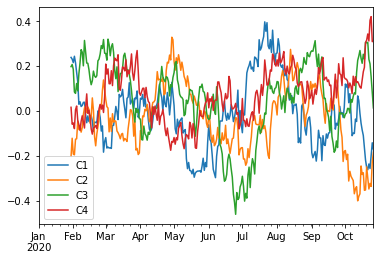

In [135]:
df.rolling(30).mean().plot()

<AxesSubplot:>

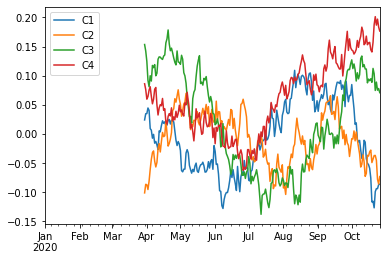

In [136]:
df.rolling(90).mean().plot()

<AxesSubplot:>

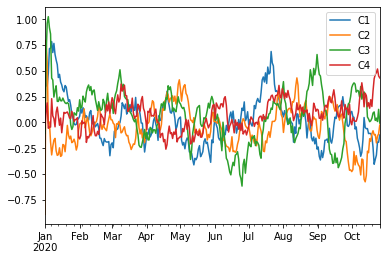

In [141]:
df.rolling('20D').mean().plot()

## 데이터 읽기 및 저장


|함수|설명|
|:--|:--|
|`read_csv`|파일, URL, 객체로부터 구분된 데이터 읽기(기본 구분자 ',')|
|`read_table`|파일, URL, 객체로부터 구분된 데이터 읽기(기본 구분자 '\t')|
|`read_fwf`|고정폭 컬럼 형식에서 데이터 읽기(구분자 없는 데이터)|
|`read_clipboard`|클립보드에 있는 데이터 읽기. 웹페이지에 있는 표를 읽어올 때 유용|
|`read_excel`|엑셀 파일(xls, xlsx)에서 표 형식 데이터 읽기|
|`read_hdfl`|Pandas에서 지정한 HDFS 파일의 데이터 읽기|
|`read_html`|HTML문서 내의 모든 테이블 데이터 읽기|
|`read_json`|JSON에서 데이터 읽기|
|`read_msgpack`|메시지팩 바이너리 포맷으로 인코딩된 Pandas 데이터 읽기|
|`read_pickle`|파이썬 피클 포멧으로 저장된 객체 읽기|
|`read_sas`|SAS 시스템의 사용자 정의 저장 포멧 데이터 읽기|
|`read_sql`|SQL 질의 결과를 DataFrame 형식으로 읽기|
|`read_stata`|Stata 파일에서 데이터 읽기|
|`read_feather`|Feather 바이너리 파일 포멧의 데이터 읽기|

### 텍스트 파일 읽기/쓰기

In [145]:
%%writefile example1.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13 ,14 ,15, csv

Writing example1.csv


In [144]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2E6B-7B15

 C:\Users\user\Documents\Data-Science\Data Analysis 디렉터리

2021-10-06  오후 08:30    <DIR>          .
2021-10-06  오후 08:30    <DIR>          ..
2021-10-01  오후 03:26    <DIR>          .ipynb_checkpoints
2021-09-30  오후 06:29               630 a.csv
2021-09-30  오후 06:24               228 a.npy
2021-09-30  오후 06:26               706 ab.npz
2021-10-01  오후 07:24            40,985 Data Analysis.ipynb
2021-10-06  오후 08:30                89 exampl1.csv
2021-10-06  오후 05:59           116,537 NumPy.ipynb
2021-09-29  오후 07:44            36,830 NumPy_exercise.ipynb
2021-10-06  오후 08:30           776,433 Pandas.ipynb
2021-10-01  오후 03:26            86,765 Pandas_exercise.ipynb
               9개 파일           1,059,203 바이트
               3개 디렉터리  196,493,754,368 바이트 남음


In [146]:
pd.read_csv('example1.csv')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [148]:
%%writefile example2.csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13 ,14 ,15, csv

Writing example2.csv


In [149]:
pd.read_csv('example2.csv', header = None)

,0,1,2,3,4,5
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [151]:
pd.read_csv('example2.csv', names = ['a', 'b', 'c', 'd', 'e','text'])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [152]:
pd.read_csv('example2.csv', names = ['a', 'b', 'c', 'd', 'e','text'], index_col = 'text')

,a,b,c,d,e
text,,,,,
hi,1,2,3,4,5
pandas,6,7,8,9,10
csv,11,12,13,14,15


In [ ]:
##txt

In [153]:
%%writefile example3.txt
   a   b   c
1 0.1 0.2 0.3
2 0.4 0.5 0.6
3 0.7 0.8 0.9

Writing example3.txt


In [154]:
pd.read_table('example3.txt', sep='\s+') # sep

,a,b,c
1,0.1,0.2,0.3
2,0.4,0.5,0.6
3,0.7,0.8,0.9


In [155]:
%%writefile example4.csv
# 파일 설명
a, b, c, d, e, text
# 컬럼은 6개가 있음
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13 ,14 ,15, csv

Writing example4.csv


In [157]:
pd.read_csv('example4.csv', skiprows = [0, 2])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [158]:
%%writefile example5.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, NA, 9, 10, pandas
11, NA, 13 ,14 ,15, csv

Writing example5.csv


In [159]:
pd.read_csv('example5.csv')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,NA,9,10,pandas
2,11,NA,13,14,15,csv


In [161]:
pd.read_csv('example5.csv', nrows = 1)

,a,b,c,d,e,text
0,1,2,3,4,5,hi


In [162]:
df = pd.read_csv('example5.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,NA,9,10,pandas
2,11,NA,13,14,15,csv


In [163]:
df.to_csv('output.csv')

In [182]:
%ls output.csv

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2E6B-7B15

 C:\Users\user\Documents\Data-Science\Data Analysis 디렉터리

2021-10-06  오후 08:42                92 output.csv
               1개 파일                  92 바이트
               0개 디렉터리  196,493,860,864 바이트 남음


In [179]:
%%writefile example.json
[{"a":1, "b":2, "c":3, "d":4, "e":5},
{"a":6, "b":7, "c":8, "d":9, "e":10},
{"a":11, "b":12, "c":13, "d":14, "e":15}]

Overwriting example.json


In [180]:
%ls example.json

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2E6B-7B15

 C:\Users\user\Documents\Data-Science\Data Analysis 디렉터리

2021-10-06  오후 08:52               121 example.json
               1개 파일                 121 바이트
               0개 디렉터리  196,493,848,576 바이트 남음


In [181]:
pd.read_json('example.json')

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15


In [183]:
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,NA,9,10,pandas
2,11,NA,13,14,15,csv


In [184]:
df.to_json('output.json')

In [188]:
# %load output.json
{"a":{"0":1,"1":6,"2":11}," b":{"0":" 2","1":" 7","2":" NA"}," c":{"0":" 3","1":" NA","2":" 13 "}," d":{"0":4,"1":9,"2":14}," e":{"0":5,"1":10,"2":15}," text":{"0":" hi","1":" pandas","2":" csv"}}

{'a': {'0': 1, '1': 6, '2': 11},
 ' b': {'0': ' 2', '1': ' 7', '2': ' NA'},
 ' c': {'0': ' 3', '1': ' NA', '2': ' 13 '},
 ' d': {'0': 4, '1': 9, '2': 14},
 ' e': {'0': 5, '1': 10, '2': 15},
 ' text': {'0': ' hi', '1': ' pandas', '2': ' csv'}}

In [186]:
pd.read_json('output.json')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,NA,9,10,pandas
2,11,NA,13,14,15,csv


### 이진 데이터 파일 읽기/쓰기

In [191]:
df = pd.read_csv('example1.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [194]:
df.to_pickle('df_pickle') # 피클로 저장
pd.read_pickle('df_pickle') # 피클파일 읽기

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [201]:
df = pd.DataFrame({'a' : np.random.randint(0, 100, size = 100),
                   'b' : np.random.randint(0, 100, size = 100),
                   'c' : np.random.randint(0, 100, size = 100)})
df

,a,b,c
0,99,69,16
1,49,57,52
2,88,31,36
3,77,10,9
4,29,76,57
...,...,...,...
95,18,0,10
96,49,64,69
97,30,18,62
98,68,42,25


In [202]:
h = pd.HDFStore('date.h5') # 계층적인 파일
h['obj1'] = df
h['dbj1_col1'] = df['a']
h['dbj1_col2'] = df['b']
h['dbj1_col3'] = df['c']
h

<class 'pandas.io.pytables.HDFStore'>
File path: date.h5

In [203]:
h['obj1']

,a,b,c
0,99,69,16
1,49,57,52
2,88,31,36
3,77,10,9
4,29,76,57
...,...,...,...
95,18,0,10
96,49,64,69
97,30,18,62
98,68,42,25


In [204]:
h.put('obj2', df, format = 'table')

In [205]:
h.select('obj2', where = ['index > 50 and index <= 60'])

,a,b,c
51,16,68,54
52,47,35,59
53,16,69,8
54,55,36,6
55,53,30,83
56,0,89,14
57,51,73,88
58,19,54,26
59,66,68,22
60,8,29,84


In [206]:
h.close()

In [207]:
df

,a,b,c
0,99,69,16
1,49,57,52
2,88,31,36
3,77,10,9
4,29,76,57
...,...,...,...
95,18,0,10
96,49,64,69
97,30,18,62
98,68,42,25


In [208]:
df.to_hdf('data.h5', 'obj3', format = 'table')

In [209]:
pd.read_hdf('data.h5', 'obj3', where = ['index < 10'])

,a,b,c
0,99,69,16
1,49,57,52
2,88,31,36
3,77,10,9
4,29,76,57
5,83,12,14
6,75,0,57
7,64,11,29
8,61,80,75
9,51,34,88


## 데이터 정제

### 누락값 처리

* 대부분의 실제 데이터들은 정제되지 않고 누락값들이 존재
* 서로 다른 데이터들은 다른 형태의 결측을 가짐
* 결측 데이터는 `null`, `NaN`, `NA`로 표기

#### None: 파이썬 누락 데이터

In [210]:
a = np.array([1, 2, None, 4, 5])
a

array([1, 2, None, 4, 5], dtype=object)

In [212]:
a.sum() # raise Error

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

#### NaN: 누락된 수치 데이터

In [213]:
a = np.array([1, 2, np.nan, 4, 5])
a.dtype

dtype('float64')

In [215]:
0 + np.nan

nan

In [216]:
np.nan+np.nan

nan

In [217]:
a.sum(), a.min(), a.max()

(nan, nan, nan)

In [219]:
np.nansum(a), np.nanmin(a), np.nanmax(a)

(12.0, 1.0, 5.0)

In [221]:
pd.Series([1, 2, np.nan, 4, None]) # None -> NaN

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [222]:
s = pd.Series(range(5), dtype = int)
s

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [225]:
s[0] = None
s[3] = np.nan

In [226]:
s

0    NaN
1    1.0
2    2.0
3    NaN
4    4.0
dtype: float64

In [228]:
s = pd.Series([True, False, None, np.nan])
s

0     True
1    False
2     None
3      NaN
dtype: object

#### Null 값 처리


In [229]:
s = pd.Series([1, 2, np.nan, 'String', None])
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [231]:
s.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [233]:
s[s.notnull()]

0         1
1         2
3    String
dtype: object

In [234]:
s.dropna()

0         1
1         2
3    String
dtype: object

In [237]:
df.head()

,a,b,c
0,99,69,16
1,49,57,52
2,88,31,36
3,77,10,9
4,29,76,57


In [236]:
df.dropna(axis = 'columns')

,a,b,c
0,99,69,16
1,49,57,52
2,88,31,36
3,77,10,9
4,29,76,57
...,...,...,...
95,18,0,10
96,49,64,69
97,30,18,62
98,68,42,25


In [238]:
df[3] = np.nan
df

,a,b,c,3
0,99,69,16,NaN
1,49,57,52,NaN
2,88,31,36,NaN
3,77,10,9,NaN
4,29,76,57,NaN
...,...,...,...,...
95,18,0,10,NaN
96,49,64,69,NaN
97,30,18,62,NaN
98,68,42,25,NaN


In [239]:
df.dropna(axis = 'columns', how = 'all') # how = 'any' -> defualt

,a,b,c
0,99,69,16
1,49,57,52
2,88,31,36
3,77,10,9
4,29,76,57
...,...,...,...
95,18,0,10
96,49,64,69
97,30,18,62
98,68,42,25


In [240]:
df.dropna(axis = 'rows', thresh = 3) # row의 nan이 아닌 값이 3개 이상이므로 행 삭제 안 함

,a,b,c,3
0,99,69,16,NaN
1,49,57,52,NaN
2,88,31,36,NaN
3,77,10,9,NaN
4,29,76,57,NaN
...,...,...,...,...
95,18,0,10,NaN
96,49,64,69,NaN
97,30,18,62,NaN
98,68,42,25,NaN


In [241]:
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [242]:
s.fillna(0) # nan값 채우기

0         1
1         2
2         0
3    String
4         0
dtype: object

In [244]:
s.fillna(method = 'ffill') # or 'bfill'

0         1
1         2
2         2
3    String
4    String
dtype: object

In [246]:
df.head()

,a,b,c,3
0,99,69,16,NaN
1,49,57,52,NaN
2,88,31,36,NaN
3,77,10,9,NaN
4,29,76,57,NaN


In [250]:
df.fillna(method = 'ffill', axis = 1)

,a,b,c,3
0,99.0,69.0,16.0,16.0
1,49.0,57.0,52.0,52.0
2,88.0,31.0,36.0,36.0
3,77.0,10.0,9.0,9.0
4,29.0,76.0,57.0,57.0
...,...,...,...,...
95,18.0,0.0,10.0,10.0
96,49.0,64.0,69.0,69.0
97,30.0,18.0,62.0,62.0
98,68.0,42.0,25.0,25.0


### 중복 제거

In [251]:
df = pd.DataFrame({'c1': ['a','b','c']*2 + ['b']+['c'],
                  'c2' : [1, 2, 1, 1, 2, 3, 3, 4]})
df

,c1,c2
0,a,1
1,b,2
2,c,1
3,a,1
4,b,2
5,c,3
6,b,3
7,c,4


In [257]:
df.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [258]:
df.drop_duplicates() # subset, keep

,c1,c2
0,a,1
1,b,2
2,c,1
5,c,3
6,b,3
7,c,4


### 값 치환

In [259]:
s = pd.Series([1., 2., -999., 3., -1000., 4.])
s

0       1.0
1       2.0
2    -999.0
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [260]:
s.replace(-999, np.nan)

0       1.0
1       2.0
2       NaN
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [263]:
s.replace([-999,-1000], np.nan)

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
5    4.0
dtype: float64

In [264]:
s.replace([-999,-1000], 0)

0    1.0
1    2.0
2    0.0
3    3.0
4    0.0
5    4.0
dtype: float64

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly